<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/DATA%20SCIENCE/CA2writeupipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data science - Coursework 2 (50%) - What caused this gravitational wave signal?

In [99]:
#Importing the necessary libraries
#!pip install corner
from corner import corner
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.interpolate import interp1d
import scipy.optimize as opt
from scipy.optimize import curve_fit

%matplotlib inline

***

## **Part A - Some background** - [15 marks]

Gravitational waves are disturbances in the curvature of spacetime, generated by accelerated
masses, that propagate as waves outward from their source at the speed of light. They are predicted
in General Relativity and other theories of gravity and since 2017, they have now been observed!

In this exercise we will analyse some mock gravitational wave data from two unknown astrophysical objects merging together and coelescing. We will use a Monte Carlo Markov Chain (MCMC) to compare a scaled model that predicts how the wave changes depending on the total mass of
the merging objects and their distance from us to the observed waveform. This will allow us to
determine the nature of the orbiting objects that merged to form the gravitational wave using
MCMC, whether for instance they could be originating from merging white dwarfs, neutron stars
or black holes.

The mock or simulated waveforms measure the strain as two compact, dense astrophysical objects
coalesce. The strain describes the amplitude of the wave. The system is parameterised by the
masses of the merging objects, $M_1$ and $M_2$, and their distance from the observer $D$.

Other useful parameters and equations relevant for this assessment are given in the Chapter 8
Jupyter Notebook.


***

#### How do astronomers know that the gravitational waves from the GW150914 event were due to two black holes merging?

**[2 marks]**

First theorised by Albert Einstein in his theory of general relativity in 1915, gravitational waves are ripples in the fabric of spacetime caused by large violent astrophysical events. The first confirmed detection of a gravitational wave was announced nearly a century later in 2016, marking a groundbreaking achievement and dawning a new era in observational astronomy. The event later denoted as "GW150914", was observed on September 14th 2015 by the Laser Interferometer Gravitational-Wave Observatory (LIGO) and confirmed a key prediction of Einstein's general theory of relativity. The event originated from a binary black hole merger with black holes of masses: $M_1\approx35^{+5}_{-3}\,M_\odot$ and $M_2\approx30^{+3}_{-4}\,M_\odot$ at a luminosity distance of approximately $D_L\approx440^{+160}_{-180}\,Mpc$. There were numerous reasons that astronomers were able to conclude that the gravitational waves from the GW150914 event were emitted by the inspiral and merger of two black holes, the main ones include:

1. **Mass and Energy Calculations:** At its peak amplitude, the orbital separation of the two bodies was estimated to be around $350km$. This is a very small value compared to the normal distance between stars, and hence enabled astronomers to constrain the objects to be extremely small or else they would have collided and merged before reaching such close proximity. The radii of main-sequence stars can be millions of kilometers, with even the smallest of stars, white dwarf stars, having radii typically ten thousand kilometers both of which would not fit with the calculated orbital separation. The most compact stars, neutron stars, have a radii of around 10 kilometers, and although two neutron stars could havev orbited at this separation without colliding or merging, the maximum mass a neutron star can have before collapsing into a black hole is around $3\,M_\odot$. However, the masses were estimated to be $M_1\approx35^{+5}_{-3}\,M_\odot$ and $M_2\approx30^{+3}_{-4}\,M_\odot$ hence ruling out neutron stars as a possibility. Hence the calculated masses of the merging objects $M_1$ and $M_2$ and the energy released (about $3\,M_\odot$) were consistent with the merging of two black holes.

2. **Matching Model Waveforms:** The observed gravitational wave signal was analysed by fitting it to theoretical models that vary based on key parameters of the black holes, such as their masses and their distance. The waveform's frequency and amplitude change over time aligned with the expected behavior of two black holes merging and was consistent with general relativity predictions for binary black hole mergers with masses $M_1$ and $M_2$ as described above. An example of this waveform matching can be seen below.

<img src="https://cplberry.com/wp-content/uploads/2016/02/c01_reconstruction.png?w=768&h=393" width="700">

3. **Final Black Hole:** The post-merger ringdown indicated the formation of a single, more massive spinning object as a result of two objects merging, with a mass typical of a black hole.

These points helped to confirm the source of the gravitational wave signal as a binary black hole merger.

**Details from the paper** - *Abbott, Benjamin P., Richard Abbott, T. D. Abbott, M. R. Abernathy, Fausto Acernese, K. Ackley, C. Adams et al. "Properties of the binary black hole merger GW150914." Physical review letters 116, no. 24 (2016): 241102.*

***

####  Describe the different parts of the waveform produced due to gravitational waves from a merging black hole event.

**[3 marks]**

The waveform produced by gravitational waves from a merging black hole event can be divided into three main phases: the **inspiral**, **merger**, and the **ringdown**. Each phase corresponds to a distinct part of the binary black hole evolution and is characterized by unique features in the waveform's frequency and amplitude.


1. **Inspiral Phase:**
The inspiral phase begins when the two black holes are orbiting each other still relatively far apart. During this phase, the black holes emit gravitational waves as they lose energy, causing their orbits to decay and the two bodies to circle closer together. This results in a characteristic "chirp" pattern, where the frequency and amplitude of the signal increases over time as the black holes spiral closer together This phase can often be described using approximations of general relativity.


2. **Merger Phase:**
The merger phase occurs when the two black holes orbit in such close proximity to each other that their event horizons merge to form a single black hole. This phase is marked by the most energetic emission of gravitational waves, with the peak amplitude of the waveform occurring at the exact moment of coalescence. The frequency continues to increase sharply as the two black holes collide, reaching its maximum at the point of the merger. This phase requires full numerical solutions of Einstein's equations due to the highly non-linear and dynamic nature of spacetime.


3. **Ringdown Phase:**
The ringdown phase begins immediately after the merger, as the newly formed black hole settles into a stable, final state. During this phase the black hole emits gravitational waves in the form of damped oscillations, known as quasinormal modes, as it loses residual distortions and approaches equilibrium. The amplitude of the gravitational waves decreases exponentially, and the frequency stabilizes as the black hole settles. The ringdown phase is governed by the properties of the newly formed black hole, like its final mass and spin, and can be described by perturbation theory in general relativity. Analysis of the ringdown provides critical information about the mass, spin, and potential deviations from general relativity.

When observed as a whole, the waveform reflects the transition from a slow, steady inspiral to a rapid merger, followed by a gradual fading in the ringdown. Each phase encodes specific information about the black hole system and the dynamics of the merger, making the study of gravitational waveforms a powerful tool for testing general relativity and exploring the universe.


**Image from:** *Almbaidin, Hisham Osama Abdel Hafez. "Theoretical Estimation of the Parameters of the Black Hole-Neutron Star Merger GW200115 via Inspiral, Merger and Ringdown IMR Numerical Relativity Frameworks." PhD diss., Hashemite University, 2023.*

***

#### The file `gravitationalwaveevents.csv` contains the properties of previously observed gravitational waves. Ultimately, we will aim to compare your merger event results with the properties from previously observed gravitational waves. Parameters obtained for these systems are known as posteriors as they are derived using Bayes Theorem (ie posterior = likelihood $\times$ prior). The errors in these values are the credible intervals from the posterior distribution derived for each parameter. Plot the **total** mass (given in solar masses, $1M_⊙ = 1.99\times 10^{30} kg$) of the merging sources against their distance (given in units of $Mpc$, $1 pc = 3 \times 10^{16}m$).

**[10 marks]**

Reading in the `gravitationalwaveevents.csv` file containing the key parameters of multiple gravitational wave events, allows us to identify any preliminary trends within the data.
This could provide valuable insights about our findings later on in the analysis. As an initial step, we can plot the parameters in order to visualise the relationship between the total mass of the merging sources and their distance from the observer, as shown in the code below.

We start by reading in the posteriors from the data file and defining the parameters (total mass and distance) with their associated errors.

In [2]:
#Reading in the posteriors and defining the parameters and their errors
posteriors=pd.read_csv('gravitationalwaveevents.csv')
total_mass = posteriors['Mtot']
mass_error = posteriors['Mtot_err']
distance = posteriors['DL']
distance_error = posteriors['DL_err']

Now we can use a plot with error bars to help us visualise the data and see how the errors vary as the total mass and distance from the observer increase.

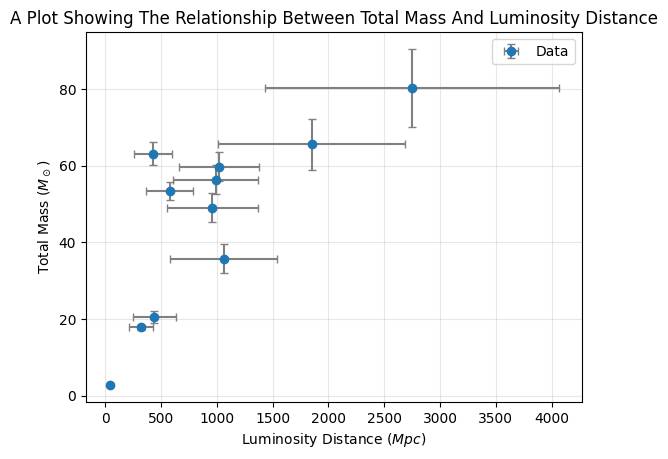

In [3]:
#Creating a plot with error bars to help visualise the data
plt.errorbar(distance, total_mass, xerr=np.abs(distance_error), yerr=np.abs(mass_error), fmt='o', label="Data", ecolor='gray', capsize=3)
plt.title("A Plot Showing The Relationship Between Total Mass And Luminosity Distance")
plt.xlabel("Luminosity Distance ($Mpc$)")
plt.ylabel("Total Mass ($M_\odot$)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

This plot shows the relationship between the total mass and the luminosity distance (in megaparsecs) where each data point represents a previously observed gravitational wave event. The vertical error bars represent the uncertainties in the total mass and the horizontal error bars show the errors in luminosity distance.

From the graph above we can make three key observations:

- A trend emerges where objects with larger total masses tend to be observed at greater distances. This is due to selection effects and does not necessarily mean larger mass systems are more common but they more produce stronger gravitational waves which are easier to detect at large distances. Smaller masses emit weaker signals that become harder to detect as the distance increases, making them less likely to be observed.

- Larger uncertainties can be seen for more distant events. This could be due to a mass-distance degeneracy where at larger masses, it becomes more difficult to separate the effects of mass and distance as higher masses can mimic stronger signals. It could also be due to detector sensitivity limits, as parts of the signals from massive mergers may occur at lower frequencies where detectors have reduced sensitivity.

- There are also several events clustered at lower distances, around $~500-1500 Mpc$, with masses around $50-60M_\odot$. This is most likely due to observational biases towards nearby events and limits in the detection sensitivity increasing the likelihood of detecting events in these specific mass and distance ranges.

From this we can determine there is a strong correlation between the luminosity distance and the total mass of the binary system.

We can estimate the means and standard deviations as they immediately tell us something useful about the data.






In [4]:
#Calculating the means and standard deviations of the data
total_mass_mean = np.mean(total_mass)
total_mass_std = np.std(total_mass)
distance_mean = np.mean(distance)
distance_std = np.std(distance)
print('The mean of the total mass is {:.2f} solar masses with a standard deviation of {:.2f} solar masses.'.format(total_mass_mean, total_mass_std))
print('The mean of the distance is {:.2f} Mpc with a standard deviation of {:.2f} Mpc.'.format(distance_mean, distance_std))

The mean of the total mass is 45.86 solar masses with a standard deviation of 22.63 solar masses.
The mean of the distance is 949.09 Mpc with a standard deviation of 736.15 Mpc.


By estimating the means and standard deviations we can get an immediate sense of how spread out or consistent the data points are around the mean.
From this, we can see that most of the detected mergers involve intermediate mass black holes with masses around $45.86M_\odot$, however the large standard deviation of $22.63M_\odot$ indicates a significant variation in the total mases. Most of the events are observed within ~1 gigaparsec, with a mean distance calculated to be $949.09Mpc$, however once again there is a wide variation with a standard deviation of $736.15Mpc$ with some events much further away.

To see if this correlation is significant, we can use a non-parametric test as they do not assume anything about the underlying distribution. In this case this is particularly important as we have a relatively small sample size with large variation and there seems to be an outlier in the data.

The data appears to be monotonic we can use the Spearmans Rho test which measures the monotonic association between two variables and only relies on the rank order of the values. It is not restricted to only linear relationships and is also not so sensitive to outliers at the extremes of the mass and distance as the Pearson correlation coefficient because points are treated by their rank rather than their intrinsic value.

We can also propose a null and alternate hypothesis:

*   **Null hypothesis ($H_0$):** There is no statistically significant correlation between the luminosity distance and the total mass of detected binary systems; $\rho=0$.
*   **Alternate hypothesis ($H_1$):** There exists a statistically significant correlation between the luminosity distance and the total mass of detected binary systems; $\rho\neq0$.

Spearman's rank correlation is given by the equation:

$\rho_s=\dfrac{\sum_{i=1}^N\,R(x_i)\,R(y_i)-N(N+1)^2/4} {\sqrt{\sum_{i=1}^N\,R(x_i)^2-N(N+1)^2/4}\sqrt{\sum_{i = 1}^N  \,R(y_i)^2-N(N+1)^2/4}}$

which, in the case of no ties as with our data (i.e. duplicates of mass and distance), the above expression reduces to:

$\rho_s=1-\dfrac{\sum_{i = 1}^N\,[R(x_i) -R(y_i)]^2}{N\,(N^2-1)}$

To perform a Spearman's Rho test on the data we can use the built-in function `stats.spearmanr` to determine a value for the Spearmans Rho correlation and a p value.

In [5]:
#Performing Spearmans Rho on the data
correlation, p_value = stats.spearmanr(distance, total_mass)
print(f"Spearman's rho: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")

Spearman's rho: 0.71
P-value: 0.01


A Spearmans rho coefficient of $\rho=0.71$ tells us that there exists a strong positive correlation between the luminosity distance of a detected binary system and it's total mass. This result implies that higher total masses are generally observed at greater distances.

Comparing our p-value of $p=0.01$ to a significance level of 0.05, we can determine that the correlation is statistically significant and that the probability of obtaining this strong of a correlation by random chance (if no relationship exists) is only 1%. Therefore we can reject the null hypothesis hat there is no correlation.

Generally higher mass systems produce stronger gravitational wave signals with larger amplitudes which can be detected more easily, even at greater distances. As the distance increases, the amplitude decreases and only the larger mass events are likely to be detected. This explains the observed trend that higher mass systems are more common at a larger distance in the data.

We can conduct further tests on the data to probe the correlation further. Kendall's $\tau$ can be used as unlike the Spearman $\rho$ statistic it does not consider the difference between ranked data, instead it only takes into account the directional agreement. That makes the Kendall's $\tau$ coefficient more appropriate for discrete data which our data is. It is defined as:

${\tau={\dfrac{({\text{number of concordant pairs}})-({\text{number of discordant pairs}})}{N(N-1)/2}}}$

where concordant pairs are pairs of values whose ranks coincide:
- $x1<x2$ and $y1<y2$ or $x1>x2$ and $y1>y2$.

and a discordant pair is one that does not satisfy this condition.

The null hypothesis, $H_0$, for Kendall $\tau$ would be that the variables are uncorrelated and the alternative hypothesis, $H_1$, is that the mass and distance are correlated.

To perform a Kendall's tau test on the data we can use the built-in function `stats.kendalltau`.

In [6]:
#Performing Kendall's tau on the data
kendall_tau, p_value = stats.kendalltau(distance, total_mass)
print(f"Kendall's Tau: {kendall_tau:.2f}")
print(f"P-value: {p_value:.2f}")

Kendall's Tau: 0.60
P-value: 0.01


***

## **Part B - The data** - [15 marks]

Now it is your turn to look at observations and measure the mass and distance of the merging system. We first need to access the observational data measured with the gravitational wave detectors (the waveform observed when two compact, dense astrophysical objects coalesce), and format it correctly.


***

####  Read in the datafile of the observed waveform `Observedwaveform.csv`. These files store the strain as a function of “GPS time” for the merger of two bodies.

**[5 marks]**

To read in the datafile containing our observed waveform, we can use the pandas library to read in the `Observedwaveform.csv` and store it in a data frame `observed_waveform`. This dataframe consists of two columns, the first column includes information about the strain of the gravitational wave, a dimensionless quantity that is a measure of how much spacetime is stretched and squeezed by the passing wave.The second column consists of the GPS time of the event, a highly accurate timing system used by satellites and GPS to count the number of seconds from an arbitrary time of January 6th 1980 at 00:00:00 UTC.

We can start by reading in the datafile using `pandas` and then define the time and strain of the observed event from the dataframe.

In [7]:
# Reading in the file Observedwaveform.csv
observed_waveform = pd.read_csv('Observedwaveform.csv')

# Defining the time and strain of the observed event from the dataframe
obs_time = observed_waveform['time (s)']
obs_strain = observed_waveform['strain']

We can then plot the observed waveform to help us get a sense of what it looks like.



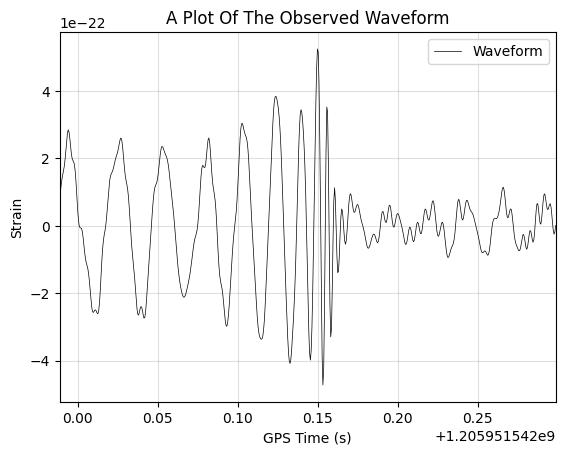

In [8]:
#Plotting the observed gravitational wave
plt.plot(obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
#Formatting the plot
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.xlim(min(obs_time),max(obs_time))
plt.title('A Plot Of The Observed Waveform')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

Replotting the above gravitational wave and identifying the three main phases of the waveform: inspiral, merger and ringdown.

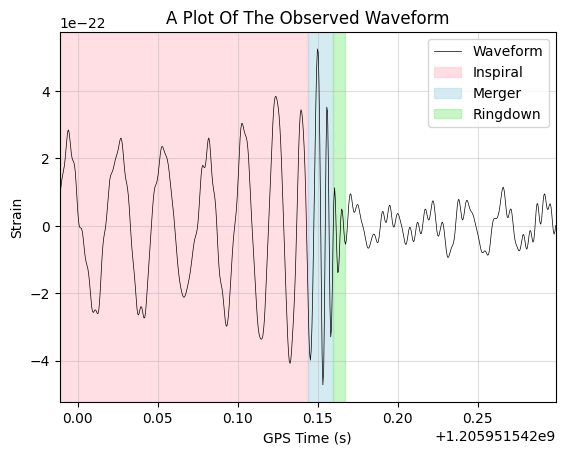

In [9]:
#Plotting the waveform with the 3 main phases identified
plt.plot(obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
#1st stage - INSPIRAL
plt.axvspan(obs_time[0],obs_time[318],color='pink',alpha=0.5, label = 'Inspiral')
#2nd stage - MERGER
plt.axvspan(obs_time[318],obs_time[350],color='lightblue',alpha=0.5, label = 'Merger')
#3rd stage - RINGDOWN
plt.axvspan(obs_time[350],obs_time[365],color='lightgreen',alpha=0.5, label = 'Ringdown')

#Formatting the plot
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.xlim(min(obs_time),max(obs_time))
plt.title('A Plot Of The Observed Waveform')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

The oscillating waveform in the plot above shows the strain induced in spacetime due to a passing gravitational wave from a compact binary merger. The x axis represents the time in seconds since a specific reference point with the duration of the gravitational wave signal lasting around $0.25$ seconds. The y axis represents the strain amplitude which is of the order of $10^{-22}$, showing the distortion of spacetime is extremely small. In the initial part of this plot we can see a characteristic chirp pattern, where the frequency of the oscillations increase with time which implies the inward spiral and of the two objects such as black holes or neutron stars. The peak of the waveform ocuring at around $t = 0.15s$ represents the mergers of the two bodies where a significant amount of gravitational energy is released. After the merger, the resulting mass emits gravitational waves as it settles down to a stationary state hence we see a damped oscillation in the plot above.

By analysing the waveform's specific features, we can determine the key properties of the merging and resultant bodies, such as the masses and spins of the merging objects, their distance from Earth and their orientation. The capability to directly observe gravitational waves has made it much easier for scientists to determine these parameters.

***

#### The GPS time of the merger for your waveform is $1205951542.153363$. Your data will need to be shifted so that the merger occurs at time = 0 seconds. This is required for when we compare model waveforms with our data as the model waveforms are simulated with the merger at $t=0s$.

**[4 marks]**

Before analysing the waveform further, we need to make some minor adjustments to help simplify the process. One key step is to shift the time scale so that the merger of the two bodies occurs at time $t=0s$. By formating our data in this way, it allows us to compare it with model waveforms which are simulated with the merger at $t=0s$.

As the two compact objects inspiral, the frequency and amplitude of the gravitational wave increase. This enables us to identify the time at which the merger occurs, $t_{merge}$, as this corresponds to the point at which the strain amplitude peaks, reaching its maximum value, $h_{max}$. By subtracting this time from all the data points, we can recenter the waveform around the merger event such that it occurs at $t=0\,s$.

We first need to identify the maximum value of the absolute strain, as the peak of the strain could be a negative or positive value. We can then find the corresponding time to the maximum strain value and plot this on our graph in order to visually assess whether this aligns with where our waveform appears to peak.

1205951542.1498382


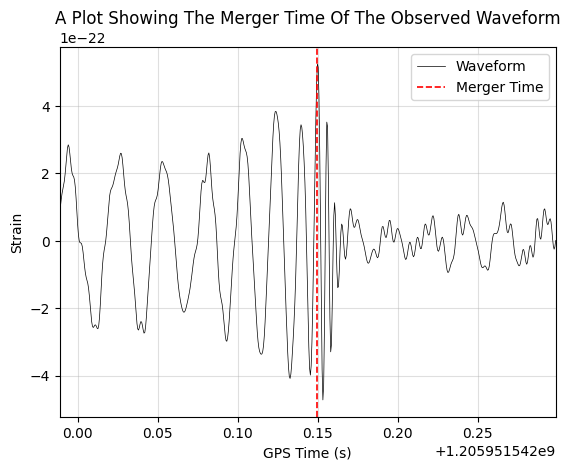

In [10]:
#Given the 'peak' strain can either be negative or positive, we need to find the max value of the absolute strain
abs_obs_strain = abs(obs_strain)

#Finding the time that corresponds to the maximum value of the strain
t_merge = obs_time[np.argmax(abs(obs_strain))]

#Plotting where t_merge occurs on the waveform to ensure that it is correct
plt.plot(obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
plt.axvline(x=t_merge, color='red', linestyle='--',linewidth=1.2, label='Merger Time')

#Formatting the plot
plt.xlim(min(obs_time),max(obs_time))
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.title('A Plot Showing The Merger Time Of The Observed Waveform')
plt.legend()
plt.grid(alpha=0.4)

print(t_merge)

Now that we have verified that the objects merged at a GPS time of $t_{merge}\approx 1205951542.15s$, we can subtract this value from our time data points in order to time shift the data such that $t_{merge}=0$.

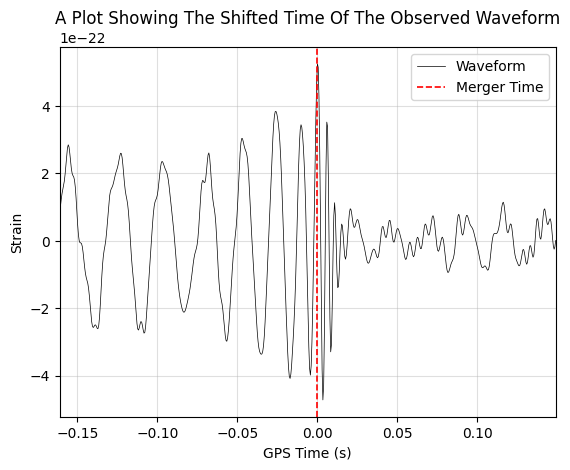

In [11]:
# Time Shifting The Data
ts_obs_time = obs_time - t_merge

#Replotting the data with the new x axis such that the merger occurs at t=0s
plt.plot(ts_obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
plt.axvline(x=0, color='red', linestyle='--',linewidth=1.2, label='Merger Time')

#Formatting the plot
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time),max(ts_obs_time))
plt.title('A Plot Showing The Shifted Time Of The Observed Waveform')
plt.legend()
plt.grid(alpha=0.4)

We can verify in the plot above that the merger now occurs at time $t=0s$ where the strain amplitude peaks. This enables us to compare model waveforms with our data.

***

#### We need to estimate the average noise and its standard deviation in our data. This requires careful thought about where the noise can be seen in the waveform.

**[6 marks]**


Before estimating the average noise and its standard deviation in the data, it's important to understand the role noise plays in gravitational wave detection. Noise represents the random fluctuations in the detector's output that are not part of the astrophysical signal. These fluctuations can come from a variety of sources, including seismic vibrations, thermal noise, and instrument electronics.

To accurately characterize the gravitational wave signal, we need to first quantify the noise properties. This involves identifying segments of the data where the signal is absent or negligible, as these regions are most representative of the noise alone. Estimating the average noise level provides a baseline, while its standard deviation helps quantify the noise's variability. Careful consideration of where the noise dominates ensures that the analysis is both accurate and unbiased.

To estimate the noise properties, we first need to identify the area of the waveform where the signal-to-noise ratio (SNR) is lowest, i.e. where the gravitational wave signal is minimal, and the background noise dominates. Referring to the plot made from part 1 which highlights the different phases of the waveform (e.g. inspiral, ringdown etc), we can disregard times $t < t_{merge}$, as we assume the signal is still present in the form of the inspiral phase. Instead, we focus on the region after the ringdown phase, which is approximately at $t\approx0.025s$. After this point, we can assume that any remaining ringdown signal (if present) is negligible, leaving only pure noise in the data. This provides a reliable basis for estimating the average noise and its standard deviation.

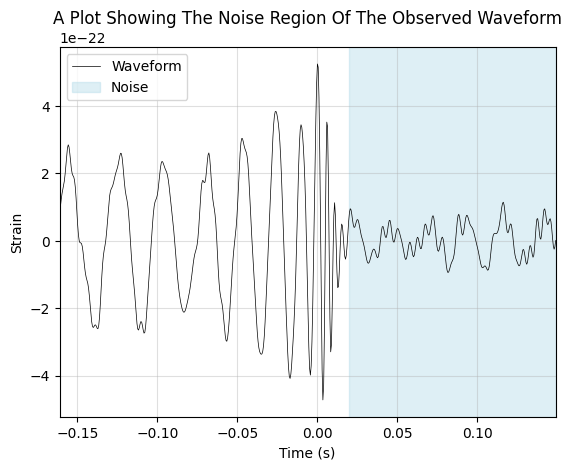

In [12]:
#Making a plot to help identify the noise after the ringdown phase at t=0.025s
plt.plot(ts_obs_time, obs_strain,color='black',linewidth=0.5, label='Waveform')
plt.axvspan(0.02,ts_obs_time[635],color='lightblue',alpha=0.4, label = 'Noise')
plt.legend(loc = 'upper left')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time),max(ts_obs_time))
plt.title('A Plot Showing The Noise Region Of The Observed Waveform')
plt.grid(alpha=0.4)
plt.show()

We can then extract this time frame from the waveform to analyse it further in order to calculate its mean and standard deviation. We can then subsequently compare the noise data to a normal distribution with the same mean and standard deviation by plotting both on the same graph to compare and examine how well they align.

As previously identified, the values of the pure noise after the ringdown phase occuring at around t=0.025s can be extracted and the mean and standard deviations can be determined. We can then make a plot of this noise with the mean and 1 sigma overlayed on the plot.

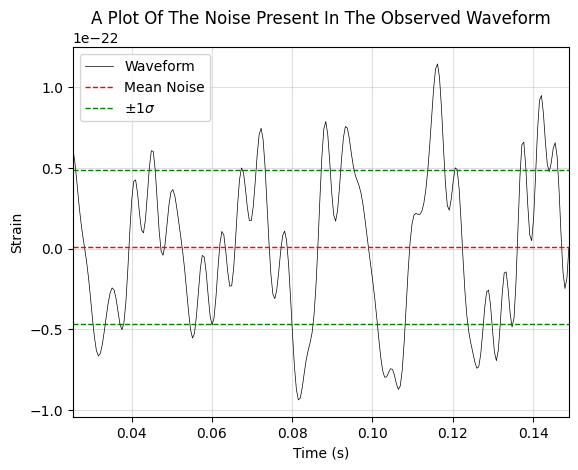

In [13]:
# Extracting the values where there's pure noise
obs_noise_time = ts_obs_time[ts_obs_time >= 0.025]
obs_noise_strain = obs_strain[ts_obs_time >= 0.025]

# Finding the mean and standard deviation
average_noise = np.mean(obs_noise_strain)
std_noise = np.std(obs_noise_strain)

# Plotting the noise values with the mean and 1 sigma overlayed on top
plt.plot(obs_noise_time, obs_noise_strain,color='black',linewidth=0.5, label='Waveform')
plt.axhline(y= average_noise, color='red', linestyle='--',linewidth=1, label='Mean Noise')
plt.axhline(y= average_noise+std_noise, color='green', linestyle='--',linewidth=1, label='$\pm1\sigma$')
plt.axhline(y= average_noise-std_noise, color='green', linestyle='--',linewidth=1)
plt.xlim(min(obs_noise_time),max(obs_noise_time))
plt.title('A Plot Of The Noise Present In The Observed Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.grid(alpha=0.4)
plt.legend()

We can now create a normal distribution using the previously calculated mean and standard distribution of the noise by using the built in function `stats.norm` to form our distribution. We can then create an evenly spaced array between the minimum and maximum values of our observed noise strain. Using another built in function `dist.pdf` in order to determine the probability density function which describes the probability of the variable falling within our set range of noise values.

The average noise value is 8.42e-25 with a standard deviation of 4.78e-23.


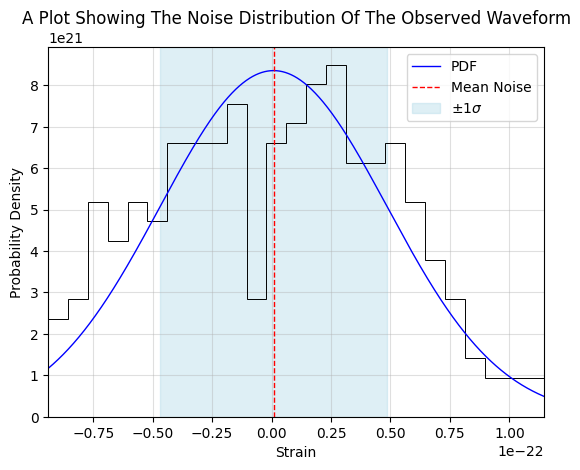

In [14]:
#Creating a normal distribution with the previously calculated mean and std of the noise
dist = stats.norm(average_noise,std_noise)
x = np.linspace(min(obs_noise_strain),max(obs_noise_strain),1000)
pdf = dist.pdf(x)

#Plotting a histogram to visualise this
plt.figure(figsize=(6.4, 4.8))
plt.hist(obs_noise_strain,bins=25,histtype ='step',density = True,linewidth=0.7, color = 'black')
plt.plot(x,pdf,color = 'blue',linewidth = 1, label='PDF')
plt.axvline(x= average_noise , color='red', linestyle='--',linewidth=1, label='Mean Noise')
plt.axvspan(average_noise - std_noise, average_noise + std_noise, color='lightblue', alpha=0.4, label='$\pm1\sigma$')
plt.xlim(min(obs_noise_strain),max(obs_noise_strain))
plt.title('A Plot Showing The Noise Distribution Of The Observed Waveform')
plt.xlabel('Strain')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.4)

print(f"The average noise value is {average_noise:.2e} with a standard deviation of {std_noise:.2e}.")

The black histogram represents the actual distribution of the noise values we observed in the data with the height of each bar indicating the frequency of the noise within each strain amplitude range. The blue curve is the PDF, an approximation of the underlying probability distribution of the noise. The mean dashed line represents the typical level of noise present in the data and the shaded region shows the standard deviation which encompasses approximately 68% of the data points.

From this , we have calculated the average noise value to be $8.42\times10^{-25}$, with a standard deviation of $4.78\times10^{-23}$. We have also found that the noise data fits reasonably well to a normal distribution. However, these values are significantly smaller than those observed when the signal is present. This is because the mean calculation includes both positive and negative values, which, due to the sinusoidal shape of the signal present, tend to cancel out and average around zero.

To get a more accurate representation, we need to repeat the calculations using the absolute values of the noise, as shown below:

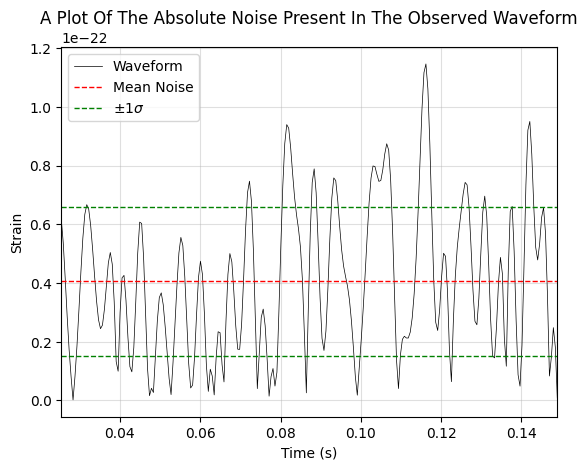

In [15]:
#Taking the absolute values of the noise
abs_obs_noise_strain = abs(obs_noise_strain)

#Finding the mean and standard deviation
average_absolute_noise = np.mean(abs_obs_noise_strain)
std_absolute_noise = np.std(abs_obs_noise_strain)

#Plotting the noise values with the mean and 1 sigma overlayed on top
plt.plot(obs_noise_time, abs_obs_noise_strain,color='black',linewidth=0.5, label='Waveform')
plt.axhline(y= average_absolute_noise, color='red', linestyle='--',linewidth=1, label='Mean Noise')
plt.axhline(y= average_absolute_noise+std_absolute_noise, color='green', linestyle='--',linewidth=1, label='$\pm1\sigma$')
plt.axhline(y= average_absolute_noise-std_absolute_noise, color='green', linestyle='--',linewidth=1)
plt.xlim(min(obs_noise_time),max(obs_noise_time))
plt.title('A Plot Of The Absolute Noise Present In The Observed Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.grid(alpha=0.4)
plt.legend()

The average noise value is 4.05e-23 with a standard deviation of 2.53e-23.


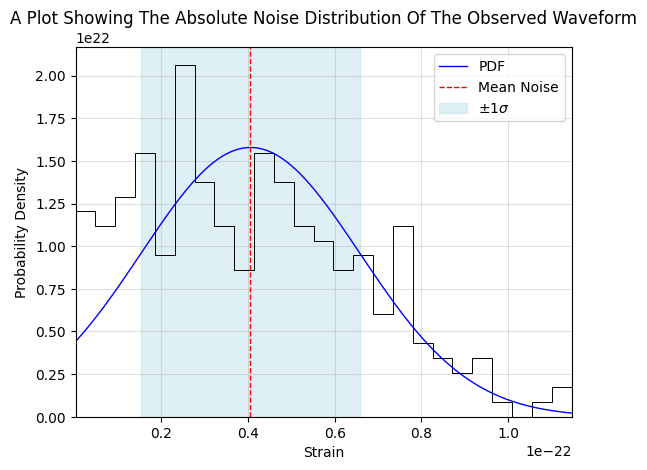

In [16]:
#Creating a normal distribution with mean and std of the noise
dist = stats.norm(average_absolute_noise,std_absolute_noise)
x = np.linspace(min(abs_obs_noise_strain),max(abs_obs_noise_strain),1000)
pdf = dist.pdf(x)

#Plotting a histogram
plt.figure(figsize=(6.4, 4.8))
plt.hist(abs_obs_noise_strain,bins=25,histtype ='step',density = True,linewidth=0.7, color = 'black')
plt.plot(x,pdf,color = 'blue',linewidth = 1, label='PDF')
plt.axvline(x= average_absolute_noise , color='red', linestyle='--',linewidth=1, label='Mean Noise')
plt.axvspan(average_absolute_noise - std_absolute_noise, average_absolute_noise + std_absolute_noise, color='lightblue', alpha=0.4, label='$\pm1\sigma$')
plt.xlim(min(abs_obs_noise_strain),max(abs_obs_noise_strain))
plt.title('A Plot Showing The Absolute Noise Distribution Of The Observed Waveform')
plt.xlabel('Strain')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.4)

print(f"The average noise value is {average_absolute_noise:.2e} with a standard deviation of {std_absolute_noise:.2e}.")

Using the absolute values of noise we have calculated the mean to be $4.05\times10^{-23}$, with a standard deviation of $2.53\times10^{-23}$. Once again we can see that the normal distribution fits the noise data relatively well particularly towards the higher values of strain.

The Kolmogorov-Smirnov (KS) test compares the distribution of a dataset with a reference distribution or another dataset. We can use the KS test to evaluate the properties of **`obs_noise_strain`** and **`abs_obs_noise_strain`** by comparing them to a reference distribution, in this case a standard normal distribution.

The null hypothesis, $H_0$, for the KS test is that the two strains are drawn from the same underlying distribution.

The alternative hypothesis, $H_1$, is that the two strains are significantly different from each other and are drawn from different underlying distributions.

Using the built-in function `stats.kstest` we can perform the KS test against a normal distribution to test our hypothesis. We can then generate a theoretical normal CDF and an empiral CDF and plot them to see how visually analyse how well they match. We can also determine the specific values of the KS statistic and p value to decide whether the results are statistically significant.



The KS Test for obs_noise_strain gives a KS statistic of 0.052 and a p value of 4.821e-01
The KS Test for abs_obs_noise_strain gives a KS statistic of 0.081 and a p value of 6.711e-02


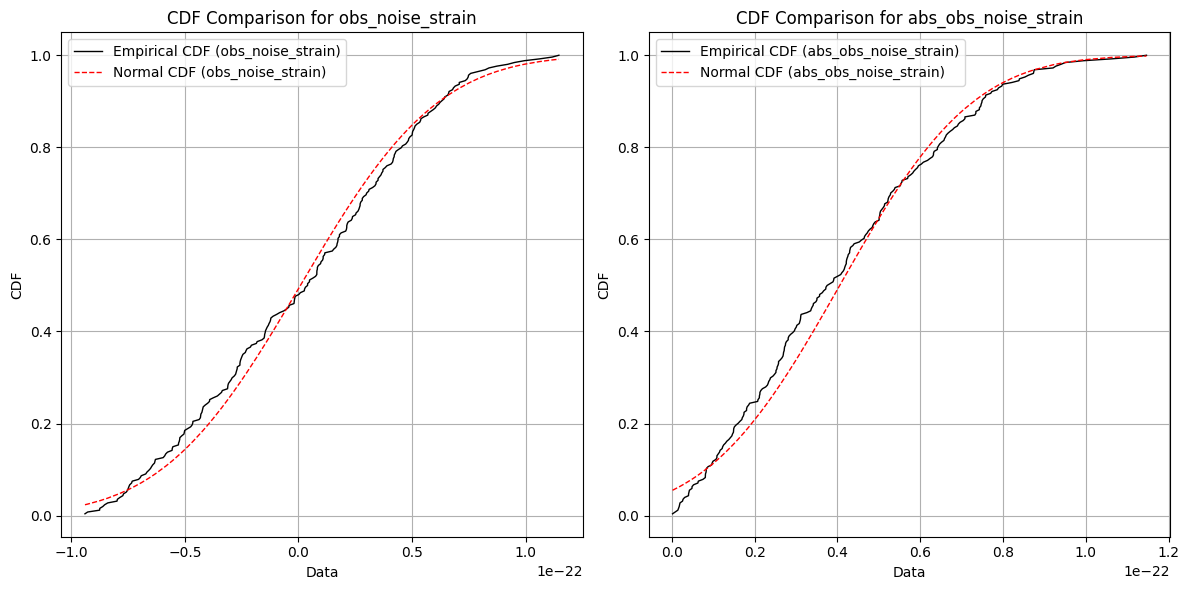

In [17]:
def check_normality_and_plot(data, label):
    # Perform KS test against normal distribution
    mean, std = np.mean(data), np.std(data)
    ks_stat, p_value = stats.kstest(data, 'norm', args=(mean, std))

    print(f"The KS Test for {label} gives a KS statistic of {ks_stat:.3f} and a p value of {p_value:.3e}")

    # Generate theoretical normal CDF
    sorted_data = np.sort(data)
    theoretical_cdf = stats.norm.cdf(sorted_data, loc=mean, scale=std)

    # Empirical CDF
    empirical_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot
    plt.plot(sorted_data, empirical_cdf, color='black',lw=1, label=f"Empirical CDF ({label})")
    plt.plot(sorted_data, theoretical_cdf, color='red',lw=1, linestyle='--', label=f"Normal CDF ({label})")
    plt.xlabel("Data")
    plt.ylabel("CDF")
    plt.legend()
    plt.title(f"CDF Comparison for {label}")
    plt.grid()

# Check normality for both arrays and plot their CDFs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
check_normality_and_plot(obs_noise_strain, "obs_noise_strain")

plt.subplot(1, 2, 2)
check_normality_and_plot(abs_obs_noise_strain, "abs_obs_noise_strain")

plt.tight_layout()
plt.show()

1. **The left plot shows the KS Test for `obs_noise_strain`**:
- **KS Statistic: 0.0520**:  
  This measures the maximum distance between the empirical cumulative distribution function (ECDF) of `obs_noise_strain` and the reference distribution. A low KS statistic (close to 0) indicates a good match between the two distributions.
- **P-value: 0.48213**:  
  This represents the probability of observing the results if the null hypothesis is true. A p-value of 0.48213 is significantly higher than our chosen significance value p=0.05 which indicates that the observed results are likely to have occured by chance if the null hypothesis is true. Because of this, there is not enough evidence to reject the null hypothesis.  

The empirical CDF does not deviate significantly from the normal CDF and hence we can confirm that the distribution of `obs_noise_strain` is consistent with the normal reference distribution.

2. **The right plots shows the KS Test for `abs_obs_noise_strain`**:
- **KS Statistic: 0.0811**:  
  This indicates a slightly larger maximum difference between the ECDF of `abs_obs_noise_strain` and the reference distribution compared to `obs_noise_strain`. While this value is still relatively small, it suggests these distributions for the absolute noise strain do not match as well as for the observed noise strain.
- **P-value: 0.06711**:  
  This is smaller than the p-value for `obs_noise_strain` but still above our chosen significance value of 0.05. So although there is some deviation from the reference distribution, it is still not statistically significant and hence once again we fail to reject the null hypothesis.

The distribution of `abs_obs_noise_strain` is less consistent with the reference distribution but does not show evidence that it deviates strongly enough to reject the null hypothesis at a 5% significance level.

### Summary:
1. The KS test results suggest that **`obs_noise_strain`** aligns well with the reference distribution, as shown by the low KS statistic and high p-value.
2. For **`abs_obs_noise_strain`**, there is a slight deviation from the reference distribution, but it is not statistically significant at the 5% significance level.
3. These results could indicate that the noise properties of the original data (`obs_noise_strain`) are well-matched to the reference distribution, while taking the absolute value (`abs_obs_noise_strain`) introduces some subtle differences in the distribution.


***

## **Part C - Interpolate reference model to match the observed data time sampling** - [15 marks]

In this part of the question we will learn to match the time samples between our reference waveform
and a mock data waveform with the same mass and distance, so they can be directly compared.
We need to do this so that in Part D onwards we can compare our observations of a gravitational
wave signal (`Observedwaveform.csv`) to a waveform with different values of $M$ and $D$.

The waveform we will use as a reference throughout this CA has known mass and distance $M =
40M_{sun}$, $D = 1Mpc$ and $q = M_2/M_1 = 1$ and is named `reference_waveform_40Msun_1Mpc.csv`.

You will also find some “mock data” for the same mass and distance in the file `mockdata_waveform_40Msun_1Mpc.csv` (which has $t = 0$ at the merger, just like the reference
waveform). Because the mock data file has the same mass and distance as our reference file, we do
not need to worry about the waveform scaling but there is something we need to fix first.

Currently the data waveforms and our reference waveforms have different sampling on the $x$ axis -
ie they have different values of $x$ (time). The reference waveforms have approx 20,000+ time steps,
yet our data has less than hundreds of data points in the same time range! We need to try and
match the $x$ times up so that for each value of 𝑥 we can compare the $y$ values from our observations
(the observed strain) with the $y$ values from the reference waveform.

We need to only consider the times when we have observed data, so we will trim our other datasets.

***

####  Open the mock data file using the `pandas` package. Our data waveform starts at some time $t_{min}$. Find out what this is. Next, take your observed data waveform and output data for $t > t_{min}$ and $t < 0$ (ie only keep information for times $≤ 0$ (before the merger), or for times where there is data). Verify, by plotting, that your new observed waveform only has data in this restricted time range.

**[5 marks]**


In this stage of the analysis, we need to match the time samples between our reference waveform and a mock data waveform with the same mass and distance, so they can be directly compared more easily. This is important as the data waveforms and the reference waveforms are sampled at different time points, meaning the x-values (time) do not align perfectly with one another.

For accurate comparison of the observed waveform (mock data) with the reference waveform, we need to ensure that both datasets are sampled at the same times. Without matching time samples, the y-values (strain) from the reference waveform cannot be directly compared to the corresponding y-values from the observed waveform. Additionally, we want to focus on the time period just before the merger event ($t=0$). Since the mock data file and the reference file both have $t=0$ as the point the objects merge, it is essential to consider only the portion of the data that lies within this time window.

We'll first start by loading the mock data waveform using the `pandas` package. We will then identify the times $t_{min}$ and $t_{max}$ at which the mock data begins and ends. Once we have done this, we will then crop our observed waveform data to these specific times, which ensures that our waveform will align with that of the mock waveform, which is fundamental in order to compare the two.

After cropping the data we will then verify our result by plotting the cropped waveform. This plot should show only data points in the time range between $t_{min}$ and $t_{max}$, which will prove that we have correctly matched the time samples.

In the context of the analysis as a whole, matching the time samples is fundamental in being able to compare our observed waveform against models, which would have otherwise been misaligned with our own data.

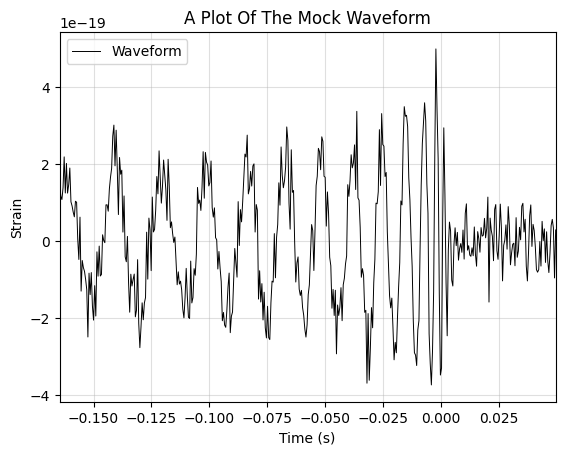

The mock data is inbetween the times: -0.16s and 0.05s.
The observed data is now inbetween the times: -0.16s and 0.05s.


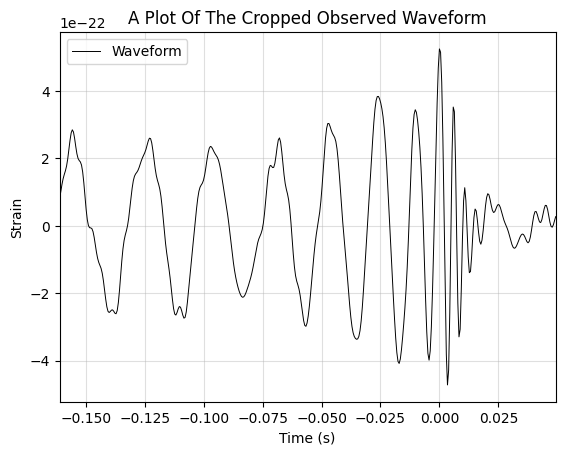

In [18]:
# Using pandas to read in the file and defining the time and strain
mock_data = pd.read_csv('mockdata_waveform_40Msun_1Mpc.csv')
mock_time = mock_data['time (s)']
mock_strain = mock_data['strain']

# Plotting the mock waveform as a reference
plt.plot(mock_time,mock_strain,color='black',linewidth=0.7, label='Waveform')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(mock_time),max(mock_time))
plt.title('A Plot Of The Mock Waveform')
plt.grid(alpha=0.4)
plt.show()

# Finding the minimum and maximum times in the mock_time array
t_min = min(mock_time)
t_max = max(mock_time)

# Cropping the observed waveform to only get data points between tmin and tmax of the mock time
ts_obs_time_two = ts_obs_time[(t_min < ts_obs_time) & (ts_obs_time < t_max)]
obs_strain_two = obs_strain[(t_min < ts_obs_time) & (ts_obs_time < t_max)]

# PLotting the cropped waveform
plt.plot(ts_obs_time_two,obs_strain_two,color='black',linewidth=0.7, label='Waveform')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.grid(alpha=0.4)
plt.title('A Plot Of The Cropped Observed Waveform')

print(f"The mock data is inbetween the times: {min(mock_time):.2f}s and {max(mock_time):.2f}s.")
print(f"The observed data is now inbetween the times: {min(ts_obs_time_two):.2f}s and {max(ts_obs_time_two):.2f}s.")

As shown in the plots above, as well as the printed time limits, both the mock data and the observed data are now confined to the time range between -0.16s and 0.05s, respectively. By cropping both arrays of data to the same time-frame, this allows us to perform further analysis on the signals more easily. The time limits shown in the plot confirm that both datasets now align within the specified time frame.

---

#### Open the reference file using the `pandas` package. We want to convert our reference waveform to have the same time sampling, ie the same number of $x$ data points as our data (in this question, our mock data). We need to interpolate the reference waveform to match the time samples of the data. To do this use the following code: assuming `ref_x[index]` and `ref_y[index]` are the reference data (time and strain respectively) and `data_x` is the observed data you wish to match the $x$ axis for (this would be `mock_x` for this question):

`from scipy.interpolate import interp1d`

`# get interpolation object using a reference waveform with ref_x (time) and ref_y (strain).`

`interp_fn = interp1d(ref_x[index],ref_y[index],bounds_error=False)`

`# now interpolate the data waveform`

`interp_strain = interp_fn(data_x)`

`# plot`

`plt.plot(data_x,interp_strain)`

#### Briefly verify that this works.

####Hints:
- #### One can use the following code example to pull out bits of data `index = np.where((data > 5)&(data < 10))[0]`. This type of statement returns a list of indices (index) where the conditions in the bracket have been met. `data[index]` pulls out `data` that satisfy the conditions in the brackets above.

**[10 marks]**


Now that we have cropped our observed data to match the time frame of the mock data, we now need to match the time sampling of a reference waveform of mass $M=40M_\odot$ and distance $D=1 Mpc$ to that of the mock data with identical parameters. This is necessary for direct comparison of the strain values at identical time points across both waveforms. Since the reference waveform has an incredibly high time resolution (more time data points) than the mock data, we need to use interpolation to estimate the reference strain at the exact time points of the mock data.  This process involves first opening the reference waveform using `pandas` which contains thousands of data points of the strain and time data for a gravitational waveform from a system of mass $M=40M_\odot$ and distance $D=1 Mpc$.

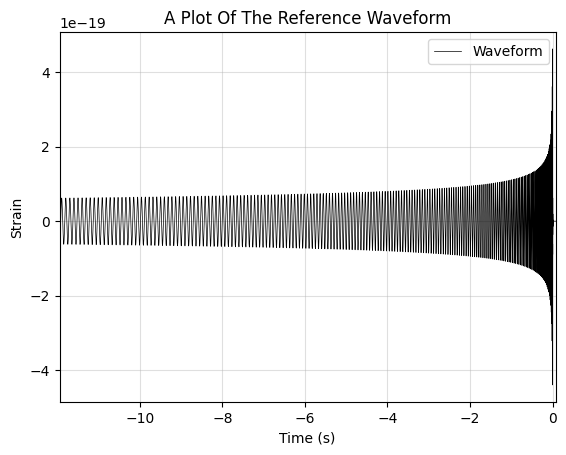

In [19]:
#Reading in the reference file using pandas
reference = pd.read_csv('reference_waveform_40Msun_1Mpc.csv')

#Defining the strain and time
ref_time = reference['time (s)']
ref_strain = reference['strain']

#Plotting the reference waveform
plt.plot(ref_time,ref_strain,color='black',linewidth=0.5, label='Waveform')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ref_time),max(ref_time))
plt.title('A Plot Of The Reference Waveform')
plt.grid(alpha=0.4)
plt.show()

We can then use the `interp1d` function from the `scipy.interpolate` module to create an interpolation object `interp_fn`, which takes the reference data ($ref_{time}$ and $ref_{strain}$) and evaluates the strain values at any time point within the time range of the data. We also set the `bounds_error` argument to `False`, so any point outside the bounds of the time rage returns `NaN` instead of an error.

We then use the interolation object `interp_fn`, to calculate the strain values of the reference waveform for the exact time points in the time array of the mock data. The result is a new strain array `interp_strain` that matches the time sampling of the mock data. We can then plot the interpolated strain values, against the mock data time points to confirm that the interpolation aligns with the reference waveform. If everything works, we would expect the interpolated reference waveform to align perfectly with the mock waveform.

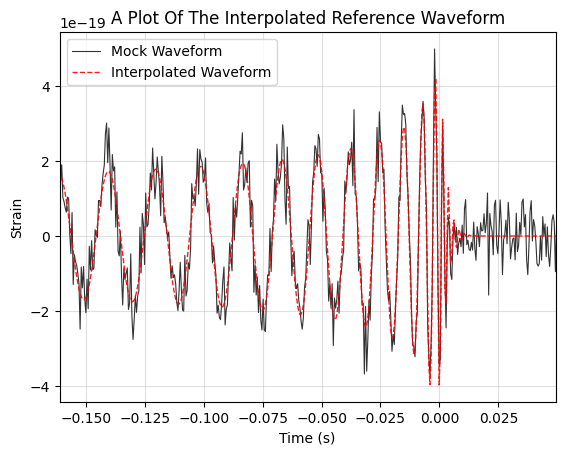

The length of the mock strain array is 440
The length of the interpolated strain array is 440


In [20]:
#Creating an interpolation object of the ref_time and ref_strain
interp_fn = interp1d(ref_time[:],ref_strain[:],bounds_error=False)

#Interpolating the ref_strain to fit the mock_time sampling
new_strain = interp_fn(mock_time)

#Plotting the interpolated strain against the mock time
plt.plot(mock_time, mock_strain,color='black',linewidth=0.8, label='Mock Waveform', alpha=0.8)
plt.plot(mock_time, new_strain,'r--',linewidth=1, label='Interpolated Waveform', alpha=0.9)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Interpolated Reference Waveform')
plt.grid(alpha=0.4)
plt.show()

# Verifying the length of the two strain arrays are the same
print(f"The length of the mock strain array is {len(mock_strain)}")
print(f"The length of the interpolated strain array is {len(new_strain)}")

As shown in the plots above, the general shape of the interpolated waveform closely matches the mock waveform as expected. The only notable deviations appear to be due to noise present within the mock data, however despite this, we can conclude that the interpolation object works correctly. To further verify this, the print statement confirms that both the mock strain array and the interpolated strain array have lengths of 440, indicating that the interpolation has again worked correctly.

---

## **Part D - Using model waveforms to estimate the total mass and distance to the system ("a by-eye estimate")** - [24 marks]

#### In this part of the question we will attempt to produce a waveform for any mass and distance values using our reference waveform with $M = 40M_\odot$, $D = 1Mpc$ and $q = M_2/M_1 = 1$ and scaling it by any new mass and distance. The reference waveform/template we will use is the same as before: `reference_waveform_40Msun_1Mpc.csv`.

#### You will need to follow the steps below when answering this question:
#### Write a function in python to produce the time $t$ and strain $h$  of a general waveform with $q = 1$, total mass $M$ and distance $D$ from the interpolation object you created above, using the equations for how the waveform strain and time depends on mass and distance from the Chapter 8 Jupyter Notebook.

**[10 marks]**

Now that we are able to successfuly interpolate a reference waveform of a known $M$ and $D$ to any time frame, we will now focus on being able to use this interpolation to scale the reference waveform to produce a waveform for any given value of mass or distance. When completed, this will allow us to to generate the gravitational waveform of any binary mass object at any distance.

This scaling can be done through two equations:

**Time Scaling**

$$t_{ref} = \frac{M_{ref}}{M}t$$

This equation scales the time array of the waveform based on the ratio of the reference mass, $M_{ref}=40M\odot$, and the mass, $M$, of the waveform we want to produce. It comes about as the timescales of gravitational wave signals depend on the total mass of the system. Larger mass systems result in a faster evolution of the waveform whereas the waveform evolves slower for smaller masses.
If the mass $M$ is greater than the reference mass $M_{ref}$, the waveform will evolve at a slower rate, stretching the time axis. The factor $\frac{M_{ref}}{M}$ compresses or expands the reference time array accordingly.


* If $M > M_{ref}$, the waveform will evolve at a slower rate than the reference waveform as the scaling factor will be less than 1 hence compressing the time axis.

* If $M < M_{ref}$, the waveform will evolve more rapidly than the reference waveform. The scaling factor will be greater than 1 and the time axis will be expanding.


**Strain Scaling**

$$h(t,M,D) = \frac{M}{M_{ref}}\frac{D_{ref}}{D}h(t_{ref})$$

The strain scaling equation, scales the strain based on the mass $M$ and distance $D$. This equation scales the strain $h$ of the waveform based on the total mass $M$ and distance $D$. From the equation we can see that the strain of a gravitational wave increases with the mass of the system. This is what we expect as more energy will be released in the form of gravitational waves. We can also see that the strain decreases with distance, because as gravitational waves propagate they lose energy, hence decreasing the strain.

By using these equations, we can adjust the reference waveform to match any given mass and distance, which is crucial for comparing gravitational wave signals from different sources.



In the next cell ,we will create a function called `ModelFunction` which takes the values for $M$ and $D$ and returns the following information:

1. **Scaling The Time:**

  `t_scaled = (40 / M) * ts_obs_time_two`
  
  The reference time array `ts_obs_time_two` is scaled by the factor $M_{ref}/M$ to account for the new mass $M$. This scaling adjusts the time points to reflect the slower or faster evolution of the waveform based on the mass. We use `ts_obs_time_two` as the reference time array because the analysis is centered around the observed data.

2. **Interpolating The Reference Strain:**

  `h_ref_scaled = interp_fn(t_scaled)`
  
  The scaled time array is passed into the interpolation object (`interp_fn`) created previously, which evaluates the strain of the reference waveform at these new time data points.

3. **Scaling The Strain:**
  
  `h_scaled = (M / 40) * (1 / D) * h_ref_scaled`
  
  The strain is scaled by the factor $\frac{M}{M_{ref}}$ to account for the mass and by the factor $\frac{D_{ref}}{D}$ to account for the distance. The combination of these two terms creates an array of the strain of a waveform with mass $M$ and distance $D$.

4. **Returning The New Strain:**

 `return h_scaled`

  Finally, the function returns an array of the strain of a gravitational waveform with paramaters $M$ and $D$.

To verify that this function works correctly, we can plot the mock data (with known parameters $M=40M\odot$ and $D=1Mpc$) along with the output of `ModelFunction(40,1)`. If the function is has worked correctly, we expect the waveforms to be almost perfectly aligned.

Text(0, 0.5, 'Strain')

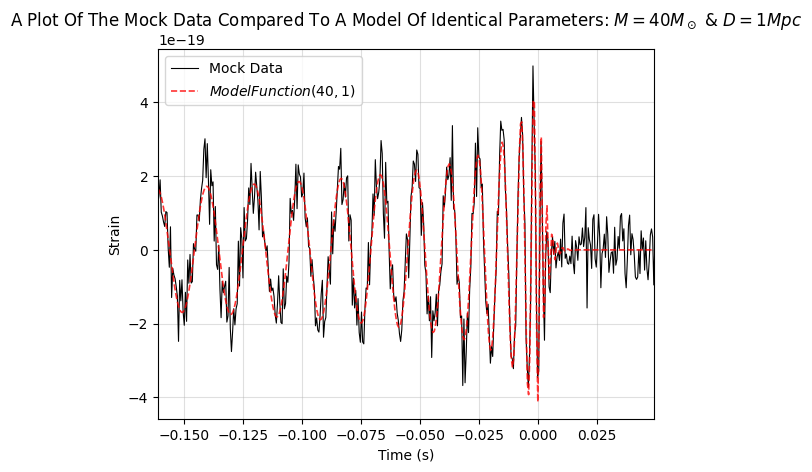

In [21]:
#Creating our function
def ModelFunction(M, D):
    t_scaled = (40 / M) * ts_obs_time_two # Scaling the time
    h_ref_scaled = interp_fn(t_scaled) # Interpolating the reference strain at the scaled time using the interpolation object defined previously
    h_scaled = (M / 40) * (1 / D) * h_ref_scaled # Scaling the strain
    return h_scaled    # Scaling the strain

# Verifying that the function works correctly
plt.plot(mock_time, mock_strain,lw=0.8, color = 'black', label='Mock Data')
plt.plot(ts_obs_time_two, ModelFunction(40,1), 'r--',lw=1.2, label='$ModelFunction(40,1)$',alpha = 0.8)
plt.legend()
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Mock Data Compared To A Model Of Identical Parameters: $M=40M_\odot$ & $D=1Mpc$')
plt.grid(alpha=0.4)
plt.xlabel('Time (s)')
plt.ylabel('Strain')

As shown in the plot above, the waveform generated by our function aligns perfectly with the mock data, confirming that the function is working as we intend and is a good fit for this data.

---

#### Test your function works by substituting in values of $M = 70M_\odot$ and $D = 5Mpc$, and compare the output waveform with the mock data in `mockdata_waveform_70Msun_5Mpc.csv`. Comment on your result.

**[6 marks]**

In this question we will again test the validity of the function created in the previous step by substituting values $M=70M\odot$ and $D=5 Mpc$ and comparing the output waveform with the mock data from the file `mockdata_waveform_70Msun_5Mpc.csv`, a waveform with these exact parameters. This test ensures that the scaling of the waveform works correctly for any given set of mass and distance values and generates accurate waveforms, which is fundamental for this analysis.

Testing the function with known values of mass and distance and comparing the resulting waveform to the corresponding mock data, serves as a verification step. By using mock data that corresponds to these specific parameters, we can directly check whether the waveform produced by our function accurately matches the expected result. This comparison allows us to identify any discrepancies between the model and the observed data, and verify that the scaling of both time and strain is functioning as expected.

To do this, we will subsitute values of $M=70M\odot$ and $D=5 Mpc$
into the function we wrote previously. This will scale the reference waveform to match the new mass and distance. We then load the mock data from `mockdata_waveform_70Msun_5Mpc.csv` using `pandas` to obtain the expected gravitational waveform for this mass and distance.
We will then compare the output of our function with the mock data by plotting both the scaled waveform and the mock data on the same graph so we can see how well they align.

This is a crucial step in the overall analysis, as it verifies that the theoretical waveforms generated by our model are accurate and reliable before comparing with real observed data.

Plotting the mock and model waveform for the given values:

Text(0, 0.5, 'Strain')

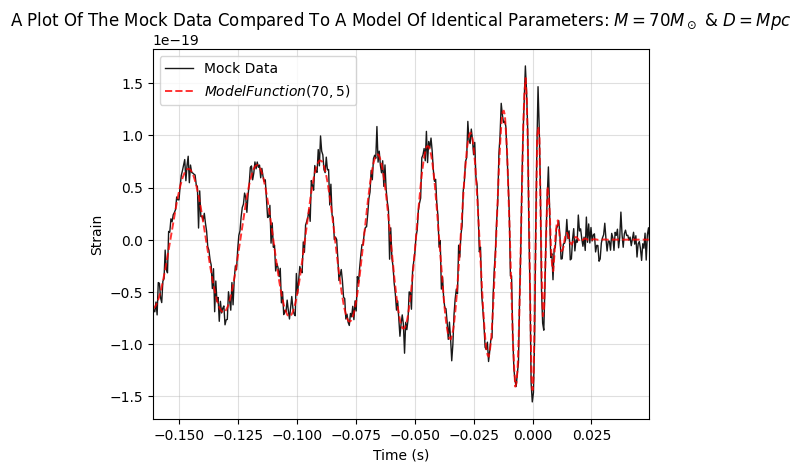

In [22]:
# Reading in the mock data
mock70 = pd.read_csv('mockdata_waveform_70Msun_5Mpc.csv')
#Assigning the different parameters labels.
mock70_time = mock70['time (s)']
mock70_strain = mock70['strain']

# Using the function to create a model waveform with M = 70 and D = 5
model_strain = ModelFunction(70,5)

# Plotting the mock data against the model
plt.plot(mock70_time, mock70_strain,lw=1, color = 'black', label='Mock Data', alpha=0.9)
plt.plot(ts_obs_time_two, model_strain, 'r--',lw=1.4, label='$ModelFunction(70,5)$',alpha = 0.8)
plt.legend()
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Mock Data Compared To A Model Of Identical Parameters: $M=70M_\odot$ & $D=Mpc$')
plt.grid(alpha=0.4)
plt.xlabel('Time (s)')
plt.ylabel('Strain')

From the above plot we can see that the black line (Mock Data) and the red dashed line (Model Function) closely overlap each other. There are some very minor deviation caused by noise within the mock data but this is to be expected This indicates a strong match between the observed gravitational wave signal and the theoretical model. The model function is parameterized with $M=70M_\odot$ and $D=5Mpc$, representing the total mass of the binary system and the distance to the source, respectively.
The agreement between the model and the data suggests that these parameter values are accurate. Both the mock data and the model function exhibit the characteristic 'chirp' pattern we see in gravitational wave strain plot, with the frequency and amplitude increasing as the binary system spirals inward and merges and then rapidly decreases in the ringdown phase after the bodies have merged.

Therefore we can conclude that the function works correctly, and the scaling method is valid for this set of parameters and so we can start using this function to look at our observed data.

---

#### Use your function to scale the reference waveform ($M = 40M_\odot$, $D = 1Mpc$) to make an initial rough estimate “by eye” of the total mass and distance that “best” fits your data (e.g. to within $+/- 5M_\odot$, $+/- 100Mpc$).

**[8 marks]**

To obtain an initial rough estimate of the total mass $M$ and distance $D$ that best fits the observed waveform signal, we can use our scaling function to compare waveforms of different parameters to the observed data. This process involves varying $M$ and $D$ then visually examining how well the resulting waveform aligns with the observed data.

To do this, we started by varying the mass while keeping the distance fixed at a placeholder value of $D=1500 Mpc$. This value meant that the strain of the waveforms were on the same scale as the observed waveform. We did this as the mass affects the frequency **and** amplitude of the wave whilst distance **only** affects the amplitude, so by first varying mass we can then find a value for the distance. We then plotted the `ModelFunction` with $D=1500 Mpc$ and $M = (30, 50, 70, 90 ,110)M\odot$. Then we plotted the resulting waveforms and compared them to the observed data.

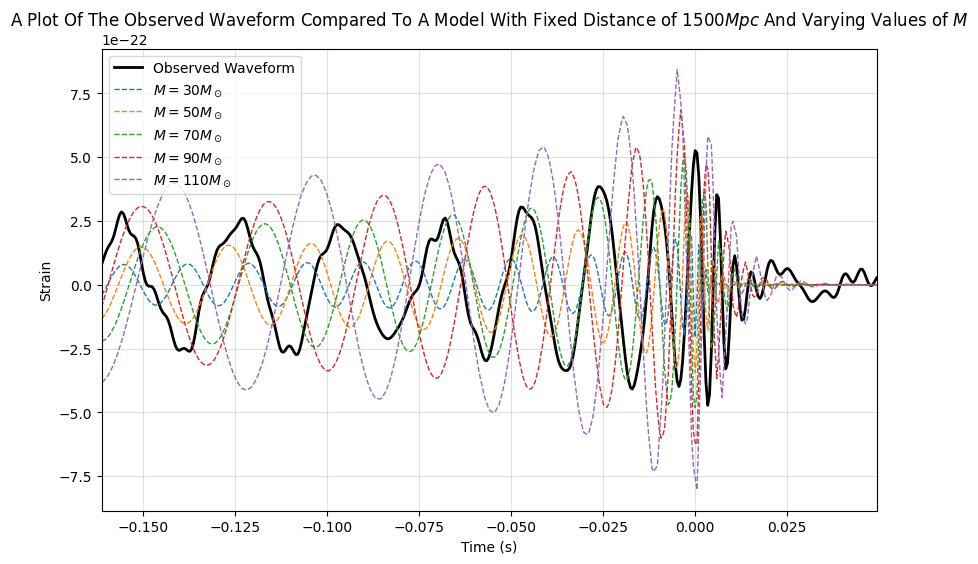

In [23]:
# Define the range of M values
M_values = [30, 50, 70, 90, 110]

# Plotting the observed waveform for reference
plt.figure(figsize=(10, 6))
plt.plot(ts_obs_time_two, obs_strain_two, color='black',linewidth=2, label='Observed Waveform')

# Looping through the different values of M and plotting ModelFunction(M, 1500)
for M in M_values:
  model_strain = ModelFunction(M, 1500)
  plt.plot(ts_obs_time_two, model_strain,'--', linewidth=1, label=f'$M = {M}M_\odot$ ', alpha = 1)

# Formatting the plot
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Observed Waveform Compared To A Model With Fixed Distance of $1500Mpc$ And Varying Values of $M$')
plt.grid(alpha=0.4)
plt.legend()

From the plot above, we found that a value of around $M=70M\odot$ provided the closest match to the observed waveform in terms of the shape and frequency. The results aren't perfect, however for a ""rough-eye" estimate, it's a good approximation.

We replotted


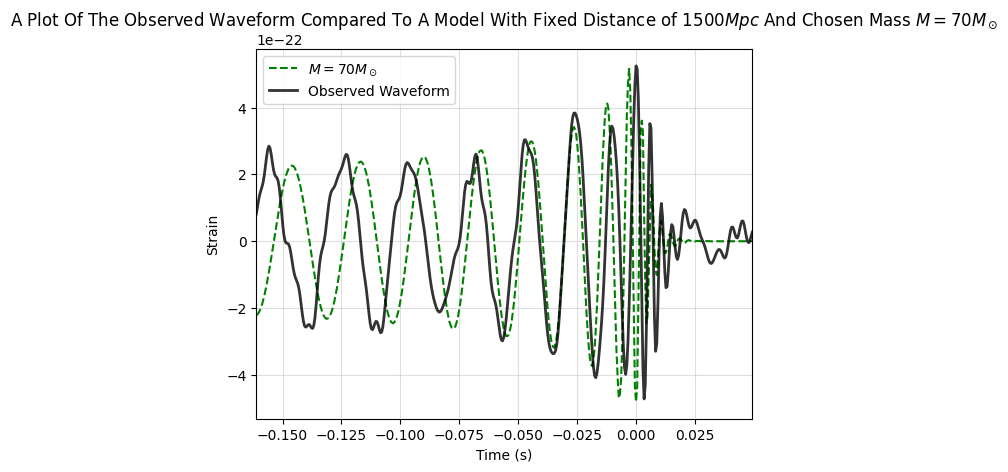

In [24]:
#Plotting M = 70 solar mass
best_model_strain = ModelFunction(70, 1500)
plt.plot(ts_obs_time_two, best_model_strain,'--', color='green', linewidth=1.5, label=f'$M = 70M_\odot$ ', alpha = 1)
plt.plot(ts_obs_time_two, obs_strain_two, color='black',linewidth=2, label='Observed Waveform', alpha=0.8)

# Formatting the plot
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Observed Waveform Compared To A Model With Fixed Distance of $1500Mpc$ And Chosen Mass $M=70M_\odot$')
plt.grid(alpha=0.4)
plt.legend()

Now we have an approximate value for $M$, we can then vary the distance over a smaller range as $D=1500 Mpc$ already provides quite a good fit. So we write a for loop that loops through $D=(1000, 1200, 1400, 1600, 1800) Mpc$ and plot `ModelFunction(70,D)` against the observed waveform to find the best match.

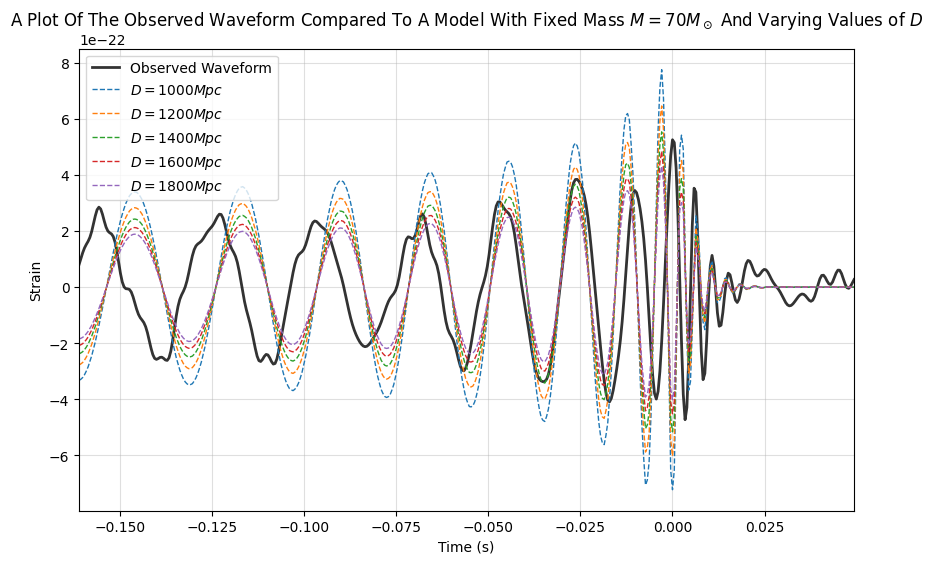

In [25]:
# Define the range of D values
D_values = [1000,1200,1400,1600,1800]

# Plotting the observed waveform for reference
plt.figure(figsize=(10, 6))
plt.plot(ts_obs_time_two, obs_strain_two, color='black',linewidth=2, label='Observed Waveform', alpha=0.8)

# Looping through the different values of D and plotting ModelFunction(70, D)
for D in D_values:
  model_strain = ModelFunction(70, D)
  plt.plot(ts_obs_time_two, model_strain,'--', linewidth=1, label=f'$D = {D} Mpc$ ', alpha = 1)

# Formatting the plot
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Observed Waveform Compared To A Model With Fixed Mass $M=70M_\odot$ And Varying Values of $D$')
plt.grid(alpha=0.4)
plt.legend()

From the plot above, the value of $D$ that seems to produce the waveform with the closest match to the observed waveform is $D=1400 Mpc$.




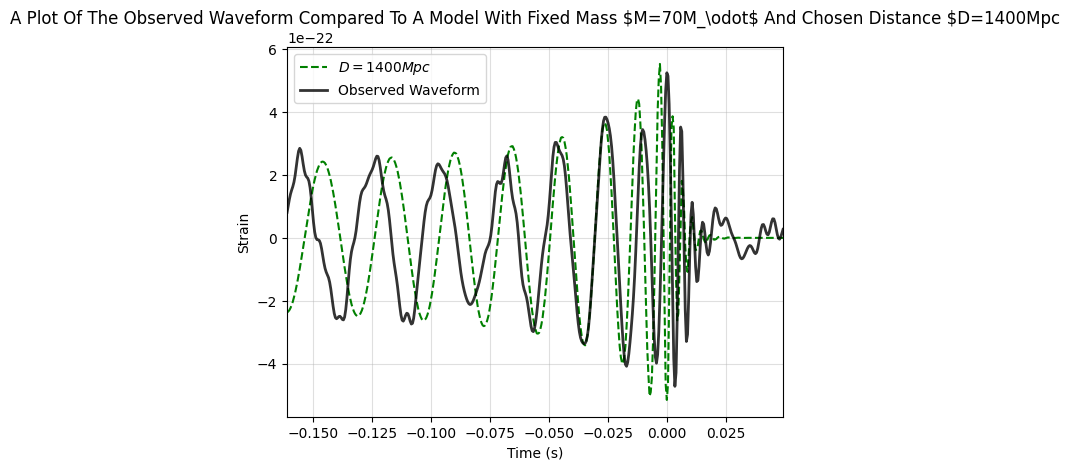

In [26]:
#Plotting D=1400Mpc
best_model_strain = ModelFunction(70, 1400)
plt.plot(ts_obs_time_two, best_model_strain,'--', color='green', linewidth=1.5, label=f'$D = 1400Mpc$ ', alpha = 1)
plt.plot(ts_obs_time_two, obs_strain_two, color='black',linewidth=2, label='Observed Waveform', alpha=0.8)

# Formatting the plot
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Observed Waveform Compared To A Model With Fixed Mass $M=70M_\odot$ And Chosen Distance $D=1400Mpc')
plt.grid(alpha=0.4)
plt.legend()

Now that we have initial guesses for $M$ and $D$, we can refine our estimates further by testing more precise values through trial and error. After doing this, we found that values of $M=73M\pm5\odot$ and $D=1450\pm100 Mpc$ produce a waveform that best fits the observed data (as shown below).



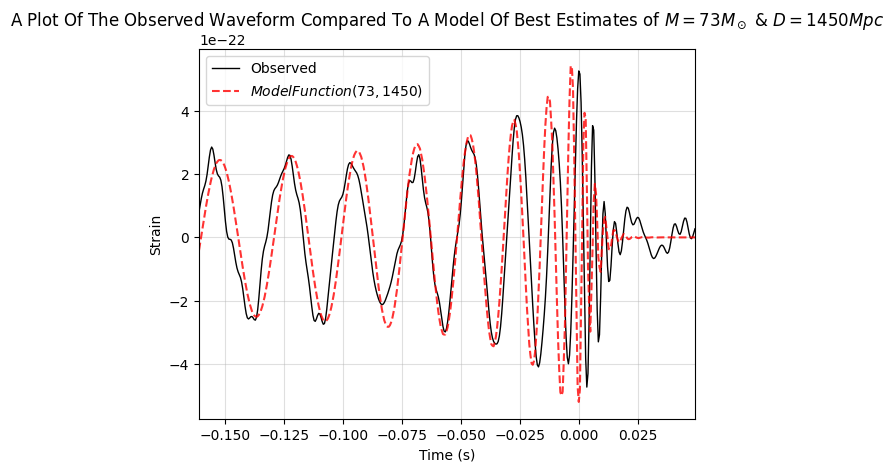

In [27]:
# Plotting the observed waveform with our model of parameters M = 73 and D = 1450
plt.plot(ts_obs_time_two, obs_strain_two, color='black',linewidth=1, label='Observed')
plt.plot(ts_obs_time_two, ModelFunction(73,1450),'r--',linewidth=1.5, alpha=0.8, label = '$ModelFunction(73,1450)$')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('A Plot Of The Observed Waveform Compared To A Model Of Best Estimates of $M=73M_\odot$ & $D=1450Mpc$')
plt.grid(alpha=0.4)
plt.legend()

While the waveforms do not match perfectly, these estimates provide a reasonably close approximation, particularly for a rough "by eye" approach. Furthermore these values not only provide a good starting point as our prior for a more precise parameter estimation process using techniques such as Monte Carlo Markov Chains, but also act as a reference to test the validity of our final results.

---

## **Part E - Estimating the total mass using MCMC** - [75 marks]

#### Now that we know how to make a waveform for any mass and distance based on scaling a reference waveform (ie $40M_\odot$, $1Mpc$ template file) and can make sure that the reference time sampling is the same as the data. We can use MCMC to find out the mass and distance of the system that merged together to create the waveform (the data) we see. You have two options in this question, each option is worth a different amount of marks.

#### Choose one out of the following options and create an MCMC to sample the parameter(s).

* #### Option 1. Use MCMC to sample the total mass and find the “best value”.
  
  **[20 marks]**

  *OR*

* #### Option 2. Use MCMC to sample the total mass and distance to find the “best values”.
  
  **[40 marks]**

As discussed earlier, the modelling of gravitational waves is fundamental in the analysis procedure to determine certain parameters of a gravitational wave. In this case we want to find the values of $M\,(mass)$ and $D\,(distance)$ that result in the best fit of our scaling function to our observed gravitational wave data.

To do this we can use Bayesian statistics, which takes into account the prior knowledge as well as the observed data to update our belief about what's being measured. In this question, we are trying to find the best fit parameters (denoted by $\theta$) given a set of data points ($D$) this can be described by the following equation:

$$P(\theta|D) = \frac{P(D|\theta)P(\theta)}{P(D)}$$

Where:
- $P(\theta|D)$ is the posterior distribution of the parameters, $\theta$,given the data, $D$.
- $P(D|\theta)$ is the likelihood of observing the data given the parameters.
- $P(\theta)$ is the prior distribution of the parameters.
- $P(D)$ is the evidence, which acts as a normalization constant (it is mostly ignored in practice).

While this is correct, solving this equation numerically often results in errors due to the extremely small values of $P(D|\theta)$. To resolve this, we can take the natural logarithm of both sides of the equation, which translates the extremely small values for likelihood, to large negative values,. These are a lot easier to solve computationally and so the above equation reduces to:

$$\log\,P(\theta|D)\,\propto\,\log\,P(D|\theta)+\log\,P(\theta)$$

Where:
- $\log\,P(\theta | D)$ is the log posterior distribution of the parameters $\theta$ given the data $D$.
- $\log\,P(D|\theta)$ is the log likelihood of the data given the parameters.
- $\log\,P(\theta)$ is the log prior distribution of the parameters.

  * We have omitted the evidence term in the equation above as it essentially acts purely as a scaling constant as we can see from the $\propto$ sign instead of the $=$ (but it still gives the same numerical result).

Looking at these terms in more detail:

**The Prior**

The prior describes our initial knowledge and beliefs on what we are mesasuring.
In this case, we can use our results from the last part of the question where we estimated the best fit parameters by fitting the model to the waveform by eye. We approximated the values for the mass and distance to be $M=75M_\odot$ and $D=1450Mpc$, respectively.

We can assume the parameters are most likely to be around these values and hence we can use these results as our priors. Using normal distributions centred around $75$ and $1450$ for the mass and distance, respectively. With standard deviations reflecting our uncertainties in these values (from trial and error methods) - $\sigma_{M}=3$ and $\sigma_{D}=5$.

In python, we use the built-in function `stats.norm` to create two different normal distributions as the priors. We can then make a function that returns the natural log of the probability of a mass $M$ and a distance $D$ from the prior. We can also code into this function to return $log(0)$ if either of the mass or distance values are negative.

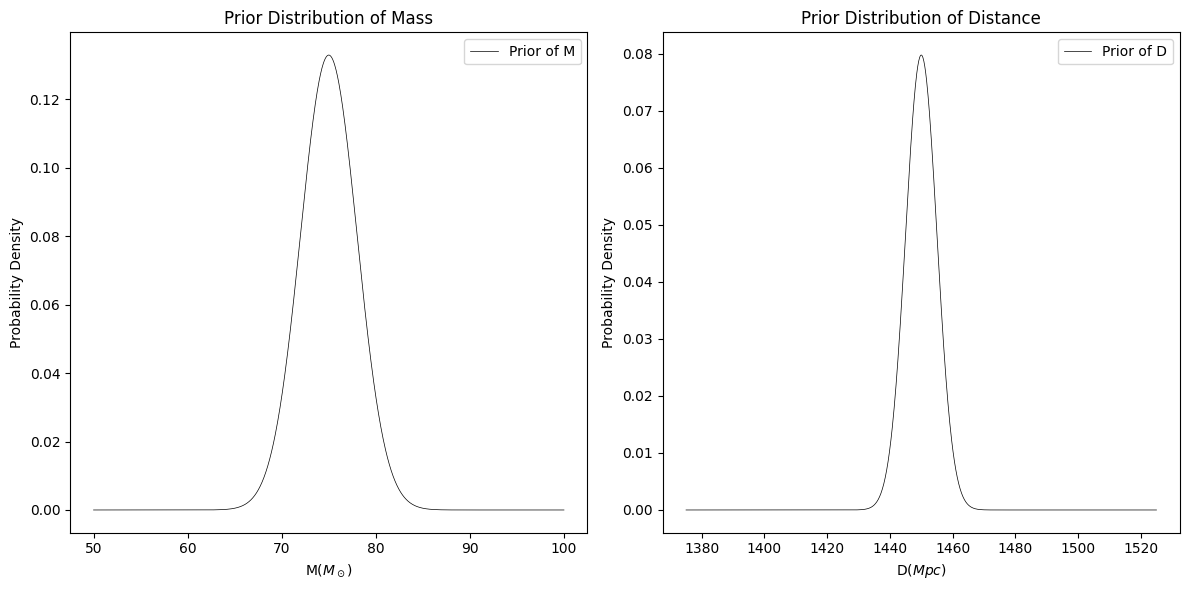

In [28]:
# Defining normal distributions for the priors
prior_M = stats.norm(75, 3)
prior_D = stats.norm(1450,5)

# Defining a function which returns the natural log of the probabilty of a mass M and distance D from the prior
def log_prior(M, D):
    if 0 <= M and 0 <= D:
        log_prior_M = np.log(prior_M.pdf(M))
        log_prior_D = np.log(prior_D.pdf(D))
        return log_prior_M + log_prior_D
    else:
        return -np.inf # returning log(0) if the mass/distance is negative

# Defining arrays of M and D values from the distribution to plot
M_values = np.linspace(50, 100, 1000)
D_values = np.linspace(1375, 1525, 1000)
prior_M_values = prior_M.pdf(M_values)
prior_D_values = prior_D.pdf(D_values)

# Plotting the priors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(M_values, prior_M_values,lw=0.5,color='black', label='Prior of M')
plt.xlabel('M$(M_\odot)$')
plt.ylabel('Probability Density')
plt.title('Prior Distribution of Mass')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(D_values, prior_D_values,lw=0.5,color='black', label='Prior of D')
plt.xlabel('D$(Mpc)$')
plt.ylabel('Probability Density')
plt.title('Prior Distribution of Distance')
plt.legend()

plt.tight_layout()
plt.show()

And, as we expected, the prior distribution is normally distributed around central values of $M=75M_\odot$ and $D=1450Mpc$.

**The Likelihood**

The likelihood forms the backbone of the anaysis and is the probability of observing the data given a set of model parameters $\theta$. In this case, the log likelihood takes the form:

$$\log\,P(D|\theta)=-0.5\frac{\sum(h_i-h(\theta)_{\text{model},i})^2}{\sigma^2}$$

where:
- $h_i$ is the strain of the observed data.
- $h(\theta)_{\text{model},i}$ is the strain produced from the model for given parameters $\theta$.
- $\sigma$ is the standard deviation of the noise within the data.

This equation is derived from the $\chi^2$ statistic, which is a measure of the goodness of fit of a model to data. The log likelihood equation essentially tells us the same thing but translated into a probability.

The log-likelihood is calculated by measuring the residuals, or the differences between the observed data points and the values predicted by the model. This is then subsequently weighted by the standard deviation of the noise.

In order for this equation be valid, we have to assume that the noise is normally distributed with a standard deviation $\sigma$, (which after doing the KS test on the data in part B, we know this is a valid assumption).

A high log-likelihood indicates that the model with the given parameters $\theta$ matches the observed data well. This happens when the residuals are small and so it tells us the probability of observing the data under this model is high, suggesting a good fit. On the other hand, a low log-likelihood suggests that the model with the given parameters does not fit the observed data very well (the residuals are large), so the probability of observing the data under this model is low.

Before doing the analysis, we can create a contour map of the log-likelihood for different values of $M$ and $D$ to get an initial visualisation of the paramater space, which will help us identify the values that give the maximum likelihood.

We start by defining a function that returns the log-likelihood for a model with paramters $\theta$ and then plot the parameter space. From this we can also determine the maximum values and plot them on the contour plot as well.

The maximum likelihood occurs when M: 72.94 solar masses, and D: 1555.18 Mpc


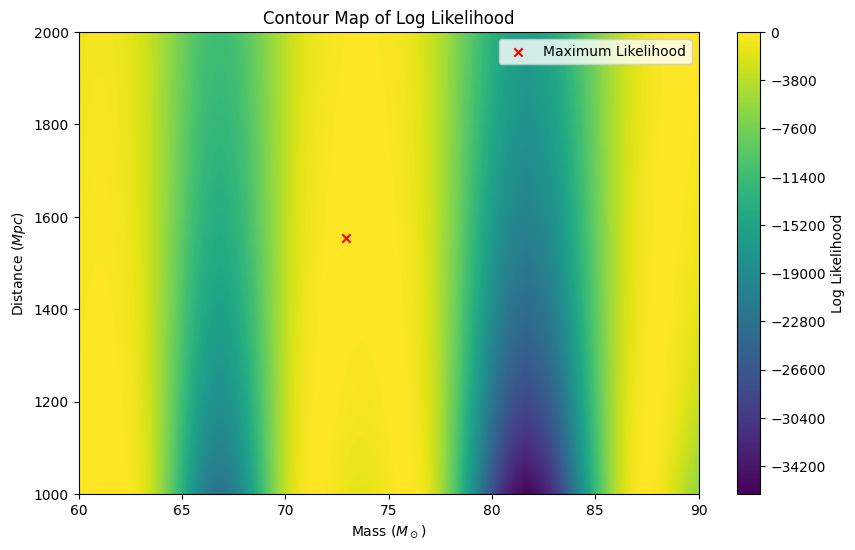

In [29]:
# Defining a function that returns the Log-likelihood
def log_likelihood(M, D):
    Model = ModelFunction(M, D) # Creating an array of the model strain with parameters M and D
    Data = obs_strain_two # The observed strain
    sigma =  std_absolute_noise # The standard deviation of the normally distributed absolute noise
    return - 0.5 * (np.sum((Data - Model)) ** 2) / (sigma ** 2) # Returning the log-likelihood

# Creating a grid of M and D values
M_values = np.linspace(60, 90, 300)
D_values = np.linspace(1000, 2000, 300)
M_grid, D_grid = np.meshgrid(M_values, D_values)

# Calculate the log-likelihood values
log_likelihood_values = np.zeros_like(M_grid)
for i in range(M_grid.shape[0]):
    for j in range(M_grid.shape[1]):
        M = M_grid[i, j]
        D = D_grid[i, j]
        log_likelihood_values[i, j] = log_likelihood(M, D)

# Creating the contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(M_grid, D_grid, log_likelihood_values, levels=200, cmap= 'viridis')
cbar = plt.colorbar(contour)
cbar.set_label('Log Likelihood')
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Distance ($Mpc$)')
plt.title('Contour Map of Log Likelihood')

# Finding the maximum values and plotting it
max_l = np.unravel_index(np.argmax(log_likelihood_values), log_likelihood_values.shape)
plt.scatter(M_grid[max_l], D_grid[max_l],color = 'red', marker='x', label='Maximum Likelihood')
plt.legend()
print(f"The maximum likelihood occurs when M: {M_grid[max_l]:.2f} solar masses, and D: {D_grid[max_l]:.2f} Mpc")

According to the contour map, the maximum likelihood occurs when $M=72.94\,M_\odot$, and $D=1555.18\,Mpc$, both of which are similar to the values estimated by-eye in the earlier part of the question. From this, we can verify that the function works as anticipated and the final posterior distributions to be approximately these calculated values.

**The Posterior**

The posterior tells us how probable different values of the parameters $M$ and $D$ are, based on the observed signal and prior knowledge. By looking at the posterior distribution, we can identify the most likely parameter values and their uncertainties for the observed waveform.

In practice, it's often difficult and computationally expensive to analytically solve for the posterior distributions. However, there are various methods we can use to approximate them, one of which is the Monte Carlo Markov Chain (MCMC) technique.


**Monte Carlo Markov Chain (MCMC)**

The main goal of an MCMC is to approximate complex probability distributions, especially when solving them analytically is not possible. By stochastically exploring the parameter space, an MCMC generates a number of samples whose histogram (should hopefully) converge to the target distribution. These samples can then be used to estimate statistical properties, such as means, medians and credible intervals. More specifically, it is particularly useful for approximating posterior distributions, where the complexity of the likelihood and prior makes analytical solutions impossible.

In this case, it allows us to approximate the posterior distributions of the parameters $M$ and $D$ for the binary system. Specifically, we will use the Hastings algorithm, which is the first version of the MCMC and is one of the top algorithms used in computational analysis. The hastings algorithm does the following:

1. **Initialize**:  
   Starts with an initial guess for the parameters, $\theta_{\text{current}}$.  

2. **Propose A Move**:  
   Generates a new candidate value for the parameters, $\theta_{proposed}$, by taking a random step:  
   $$\theta_{\text{proposed}} = \theta_{\text{current}}+\Delta\theta$$  

3. **Evaluates the Proposal**:  
   Compares the target distribution values at the proposed and current locations:  
   - If $P(\theta_{proposed})>P(\theta_{current})$, it accepts the move (to a higher probability region).  
   - Otherwise it computes the probability of accepting the move as:  
     $$p_{\text{move}}=\min\left(\frac{P(\theta_{proposed})}{P(\theta_{\text{current}})},1\right)$$

4. **Accepts or Rejects**:  
   - Then it generates a uniform random number $u_{rnd}$ between 0 and 1.  
   - If $u_{rnd}\leq p_{\text{move}}$, it accepts the proposed move and sets $\theta_{current} = \theta_{proposed}$.  
   - Otherwise it rejects the move and remains at the current position.  

5. **Stores the Value**:  
   It then saves the value of $\theta_{current}$, regardless of whether the move was accepted or rejected.  

6. **Repeat**:  
   It then returns to step 2 using the updated $\theta_{current}$ for the next iteration.  

This process generates a sequence of of samples of length $N_{MCMC}$ that approximate the posterior distribution $P(\theta)$. Over time, the algorithm explores the probability space, eventually focusing on regions of higher probability, reflecting the true posterior distribution - this is called convergence.


In terms of this analysis, we first define a log posterior function that returns the sum of the log priors and log likelihood for the parameters $M$ and $D$. We then set $N_{MCMC}=30,000$, which was chosen to ensure that the probability space is efficiently explored while also being computationally viable. In an ideal world we would have as many iterations as possible, but we found that this number strikes a good balance between the two.

Next, we create a 2D array, $\theta_{current}$, with a length of $N_{MCMC}$ which stores the mass and distance values. The initial values are set to our initial guesses, $M = 70$ and $D = 1400$. These values were chosen to be close to our expected parameters but far enough away to ensure the probability space is explored thoroughly and no biases are introduced.

We then choose step sizes for $M$ and $D$ as $\sigma_{M} = 0.1$ and $\sigma_{D} = 5$. The choice of step size is crucial because if it is too large, the chain could jump over the high probability areas, resulting in poor sampling of the posterior distributions. Whereas if the step size is too small, the chain might move too slowly and potentially get stuck in local regions.
These step sizes were chosen as they reflect the different scales of the two parameters. Since the distance varies more over a wider range than the mass, the step size for $D$ is larger. These values were found to be most efficient over numerous runs.

A good way to test the efficiency of an MCMC is the acceptance ratio, which is the fraction of proposed moves that are accepted:
$$\frac{N_{accepted}}{N_{mcmc}}$$

For an efficient Metropolis-Hastings MCMC, this value should be $\approx0.4$. This indicates that the chain explores the probability space efficiently. By calculating this value, we can assess the efficiency of our MCMC.

In [30]:
# Defining a function that returns the log posterior
def log_posterior(M, D):
    log_prior_value = log_prior(M, D)
    log_likelihood_value = log_likelihood(M, D)
    return log_likelihood_value + log_prior_value

# Setting the initial conditions
N_mcmc = 30000 # Number of iterations
theta_current = np.zeros((N_mcmc + 1, 2))  # Empty 2D array: [M, D]
theta_current[0] = [70, 1400] # Setting the initial conditions
n_acceptance = 0 # Initialising the acceptance ratio

# Step sizes of M and D
sigma_M = 0.1
sigma_D = 5

# Performing the MCMC
for i in range(N_mcmc):
    p_current = log_posterior(*theta_current[i])
    dtheta_M = np.random.normal(0, sigma_M)
    dtheta_D = np.random.normal(0, sigma_D)
    theta_proposed = theta_current[i] + [dtheta_M, dtheta_D]
    p_proposed = log_posterior(*theta_proposed)
    # If the proposed parameters have a higher probability than the current ones
    if p_proposed > p_current:
        theta_current[i + 1] = theta_proposed
        n_acceptance += 1 # Increasing N_accepted
    # Calculating the probabilty of moving if the proposed parameters have a lower probability than the current ones
    else:
        p_move = np.exp(p_proposed - p_current)
        if np.random.uniform(0, 1) <= p_move:
            theta_current[i + 1] = theta_proposed
            n_acceptance += 1
        else:
            theta_current[i + 1] = theta_current[i]

# Cropping the values to exclude the first 1000 values so we can focus on the converged iterations
burn_in = 1000
theta_samples = theta_current[burn_in:]

# Calculating the acceptance ratio
accept_rate = n_acceptance / N_mcmc

# Calculating the mean and standard deviations of the samples of M and D
mean_M = np.mean(theta_samples[:, 0])
std_M = np.std(theta_samples[:, 0])
mean_D = np.mean(theta_samples[:, 1])
std_D = np.std(theta_samples[:, 1])
print(f"The acceptance rate is {accept_rate:.2f}")
print(f"The mean for M is {mean_M:.2f} solar masses with a standard deviation of {std_M:.2f}.")
print(f"The mean for D is {mean_D:.2f} Mpc with a standard deviation of {std_D:.2f}.")

The acceptance rate is 0.41
The mean for M is 72.54 solar masses with a standard deviation of 0.06.
The mean for D is 1450.05 Mpc with a standard deviation of 4.88.


---

#### Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC. Has your MCMC converged?

**[20 marks]**

Now that we have successfuly run the MCMC, we can examine the chain further to ensure everything has run correctly and efficiently. There are multiple plots we can produce to help us understand whether it has been successful, including:

**Trace Plots**

Trace plots show the evolution of the sampled parameter values over all the MCMC iterations. Each point represents a parameter value drawn at a specific iteration. They serve as an intial visual assessment on whether the MCMC chains has converged to the target posterior distribution. You can typically tell when a chain has converged as it tends to stick close to a specific value. On the other hand, chains that seem to fluctuate across a wide range of values suggest that it hasn't converged yet.  Exhibit trends, drifts, or stickiness also suggest the sampler has not yet reached equilibrium.

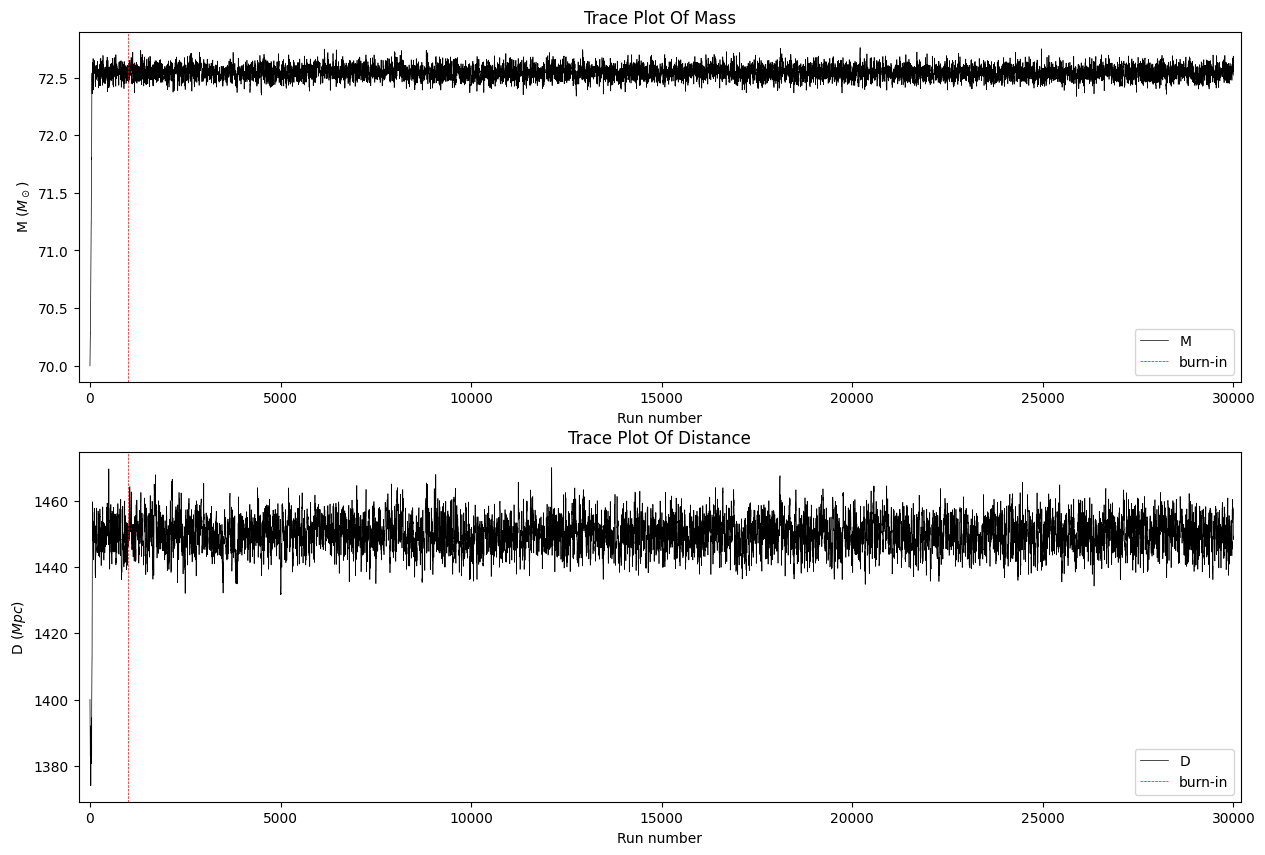

In [31]:
# Trace plot of mass
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.plot(theta_current[:, 0],lw=0.5, color='black', label='M')
plt.axvline(x = burn_in, color='r', linestyle='--', lw = 0.5, label='burn-in')
plt.xlim(-300,len(theta_current)+200)
plt.xlabel('Run number')
plt.ylabel('M ($M_\odot$)')
plt.title('Trace Plot Of Mass')
plt.legend()

# Trace plot of distance
plt.subplot(212)
plt.plot(theta_current[:, 1],lw=0.5, color='black',label='D')
plt.axvline(x = burn_in, color='r', linestyle='--', lw = 0.5, label='burn-in')
plt.xlim(-300,len(theta_current)+200)
plt.xlabel('Run number')
plt.ylabel('D ($Mpc$)')
plt.title('Trace Plot Of Distance')
plt.legend()

As we can see from the trace plots above, both parameters $M$ and $D$ appear to converge after approximately $500$ iterations, stabilizing at values of $M\approx72.5M\odot$ and $D\approx1450 Mpc$. While they may look as though they have converged, there is a more analytical approach we can use to confirm whether they have successfully converged or not. One technique is to compute the autocorrelation of the MCMC samples.

**Autocorrelation**

Autocorrelation measures the correlation between samples as a function of the lag (the number of steps between samples). A large decrease in autocorrelation suggests that the samples are independent and the chain has efficiently explored the parameter space. However a high autocorrelation suggests that the chain is not mixing well.


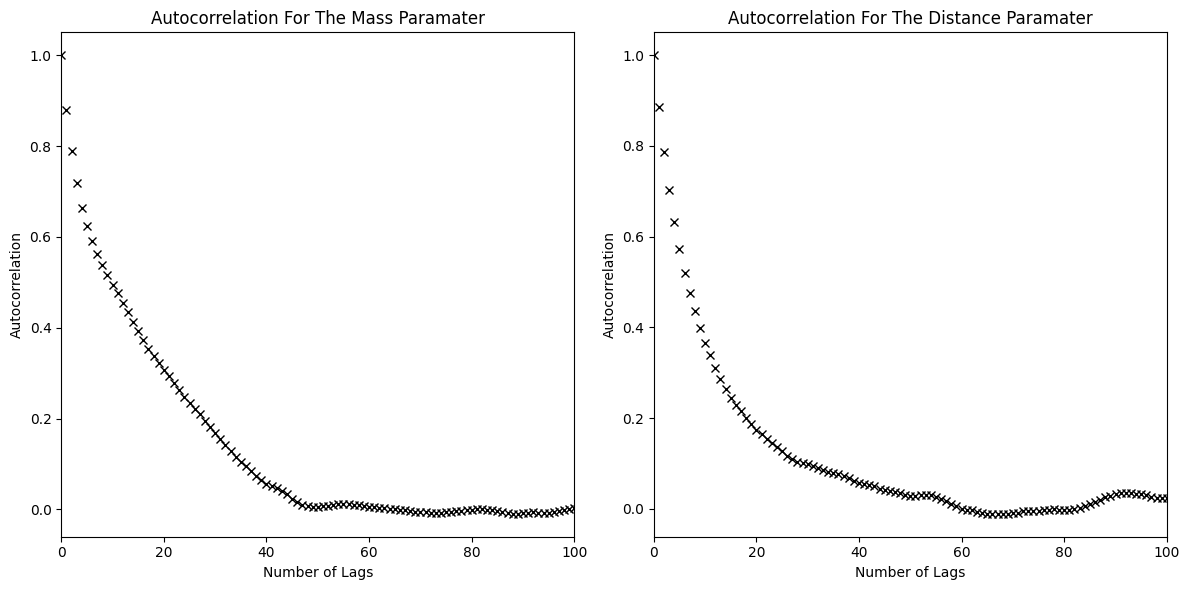

In [32]:
# Autocorrelation for mass
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.acorr(theta_current[:, 0] - np.mean(theta_current[:, 0]), color='black',marker='x', maxlags=100, normed=True, usevlines=False)
plt.xlim(0, 100)
plt.ylabel('Autocorrelation')
plt.xlabel('Number of Lags')
plt.title('Autocorrelation For The Mass Paramater')

# Autocorrelation for distance
plt.subplot(1, 2, 2)
plt.acorr(theta_current[:, 1] - np.mean(theta_current[:, 1]), color='black',marker='x', maxlags=100, normed=True, usevlines=False)
plt.xlim(0, 100)
plt.ylabel('Autocorrelation')
plt.xlabel('Number of Lags')
plt.title('Autocorrelation For The Distance Paramater')
plt.tight_layout()

Looking at the plot on the left, the autocorrelation starts at 1 as we would expect and over time it tends towards zero after approximately 60 lags.

Comparing this to the plot on the right, the autocorrelation also starts at 1 and tends towards 0, however it initially decays at a faster rate, and then slows down to reach an autocorrelation of 0 at around 80 lags.

The relatively fast decrease in autocorrelation of both of the parameters tells us that they have indeed converged. If the autocorrelation remained high for lots of lags, it suggests the chain hasn't explored the probability space efficiently or has become stuck in a local minimum.
To conclude, this provides further indication that the chains have converged.

**Posterior Distribution Histograms**

Histograms are the most widely used plot in parameter estimations as they are essential in displaying the distribution of the posteriors values. They help to show the shape of the distribution, including the spread of the values in comparison to the central value.

Before plotting the histograms, we can expect to observe certain characteristics if the MCMC has run correctly. First of all, the distributions should be a Gaussian shape since the chains have converged around mean values, and our priors and likelihoods are normally distributed, forming a conjugate prior that guarantees a Gaussian posterior if done correctly. We also expect the histogram for the distance parameter $D$ to have a larger spread compared to the mass parameter $M$, as the distance prior for has a larger standard deviation, resulting in a wider spread of its posterior distribution. Finally, the histograms should be centered around the mean values in the converged chains, indicating that the MCMC sampling has been accurate. Together these characteristics help to confirm that the MCMC has performed as expected and produces reliable approximations for the posteriors.

Plotting the histograms:


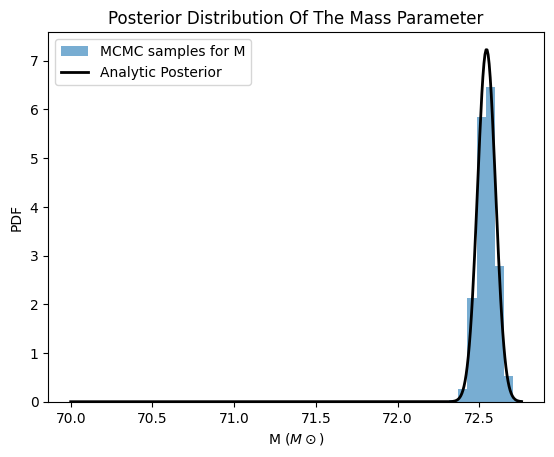

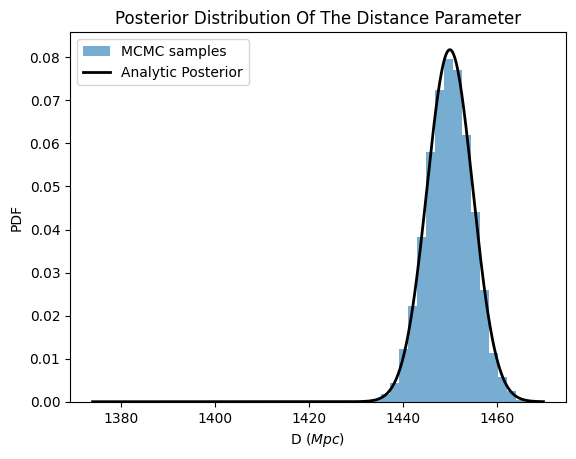

In [33]:
# Plotting the histogram of mass samples and the PDF
x_M = np.linspace(min(theta_current[:, 0]), max(theta_current[:, 0]), 432)
posterior_M = stats.norm.pdf(x_M, mean_M, std_M)
plt.hist(theta_current[:, 0], bins=50, density=True, alpha=0.6, label='MCMC samples for M')
plt.plot(x_M, posterior_M, label='Analytic Posterior ', color='black', linewidth=2)
plt.xlabel('M ($M\odot$)')
plt.title('Posterior Distribution Of The Mass Parameter')
plt.ylabel('PDF')
plt.legend()
plt.show()

# Plotting the histogram of distance samples and the PDF
x_D = np.linspace(min(theta_current[:, 1]), max(theta_current[:, 1]), 432)
posterior_D = stats.norm.pdf(x_D, mean_D, std_D)
plt.hist(theta_current[:, 1], bins=50, density=True, alpha=0.6, label='MCMC samples')
plt.plot(x_D, posterior_D, label='Analytic Posterior', color='black', linewidth=2)
plt.title('Posterior Distribution Of The Distance Parameter')
plt.xlabel('D ($Mpc$)')
plt.ylabel('PDF')
plt.legend()
plt.show()

Focusing on the posterior distribution of the mass parameter first, we can see that the shape is gaussian as we expected and it is centred around $M\approx72.5M\odot$. This is further validated by the Gaussian PDF plotted over the top, which has a mean and standard deviation determined by the mass samples. The close agreement between the histogram and the PDF confirms the expected behavior.

Similarly, the posterior distribution for the distance parameter is also normally distributed, centered around $D\approx1450 Mpc$. As we initiall thought, the distance parameter has a larger spread compared to the mass parameter due to its prior having a larger standard deviation. The symmetry and concentration of the samples around the mean for both parameters indicates the chains are well converged. This agreement with our previously stated expectations confirms that the MCMC sampling has worked correctly, and accurately produces the posterior distributions.

As an extra step, we can further analyse the posterior distributions of the parameters by directly comparing them through the use of corner plots.


**Corner Plots**

Corner plots are a way of displaying the histograms of multiple parameters in a grid format. The distributions are displayed along the main diagonal, while the non-diagonal plots show the relationship between the different parameters.
They are used a lot in gravitational wave analsyis as they help to visualise the relationships between parameters, and enable us to identify any significant correlations or trends. By create a corner plot of the mass and distance posterior distributions, we can examine how they change with respect to each other and identify any potential correlations.

We use `pip install` to download corner into our notebook and then import it at the very start of this coursework alongside all the other necessary libraries used.

Text(0.5, 0.98, 'A Corner Plot of Mass and Distance Parameters')

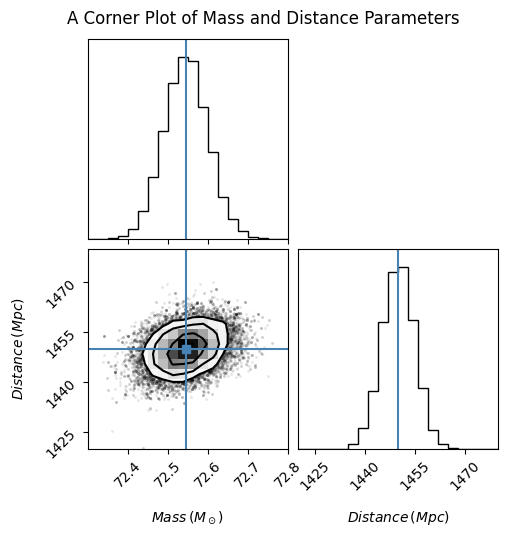

In [34]:
# Plotting the corner plots
limits = [(72.3, 72.8), (1420, 1480)] #Setting up limits
figure = corner(theta_current, labels=[r'$Mass\,(M_\odot)$', r'$Distance\,(Mpc)$'], truths=[mean_M, mean_D], range=limits)
figure.suptitle('A Corner Plot of Mass and Distance Parameters')

As previously explained, the histograms along the diagonal represent the  posterior distributions of $M$ and $D$, and in the bottom left corner, we can see a scatter plot of the joint distribution of the parameters. The contour lines represent regions of increasing posterior density, with the central contours showing the most probable values of mass and distance.

From the scatter plot we can see that there is a slight correlation between $M$ and $D$, where an increase in one parameter causes an increase in the other. This is what we expect as they each have the opposite effect on a gravitational wave signal, if the mass increases the amplitude increases, whereas if the distance increases, the amplitude decreases, so we expect this slight correlation. Finally, where the blue lines intersect are the "best-fit" values for $M$ and $D$, these values align with the peaks of the histograms and indicate the region of highest probabbilty between the two.



To conclude, we have sufficient evidence to confirm that the MCMC has indeed converged, and produced normally distributed posterior distributions centered around the values $M=72.5 M\odot$ and $D=1450 Mpc$.

---

#### Report the median and 90% credible limits on your value of $M$ and comment on your values. Compare the waveform generated from your MCMC result with the observed waveform.

**[15 marks]**

You may assume that:
- the noise is described by a Gaussian distribution,
- the total mass of the system is in the range $[20,100] M_\odot$.
- Think carefully about what the likelihood function will be in this case (see Chapters 6-9) since we are trying to find out how good our model is matching the data.

**Hints:**

* You should work with “log(Likelihood)” to avoid numerical errors - note this will affect both your posterior and the step in the MCMC chain where we usually write $P_{proposed} / P_{current}$

* The step size between samples of the MCMC is quite important. A suggested value is $0.1 M_\odot$

* The initial guess of your mass is also very important. You may find yourself getting into a local minimum rather than your code finding the true minimum. You could always start close to the estimate from Part D3.

* Test your MCMC on a small number of samples (e.g. 10-100) before trying it with a larger number (e.g. 105 or 106)

* At the end, ask yourself if you need to include every sample?

* Depending on your step size, this part can take a long time to run. Suggest that you moveall your plotting routines to a different code cell to save you re-running everything 10000s of times when you just want to change a plot command.

* To find out how long it will take for a Jupyter notebook to compile the MCMC code cell, add the following snippet to your code before you go into your MCMC loop (where Nsteps is the number of steps your MCMC is using):

`def time_spent_waiting(n):`

`from datetime import datetime,timedelta`

`preddur=[n*0.01,n*0.02]`

`print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))`

`return`

Now that we have successfully carried out the MCMC analysis and verified its efficiency and accuracy, we can obtain the final best fit parameters for the mass and distance that fit the model to the observed data.

To summarise the results, we can determine three key values:
- The median of the posterior distributions of the parameters.
- The 90% credible limits.

**The median**

The median is especially important in this case as it represents the point in which 50% of the posterior distribution lies below that certain value and 50% lies above, making it the most accurate way of determining the central values of the distributions.
Furthermore, unlike the mean, the median is less sensitive to outliers,
which enables us to obtain a more representative estimate of the posterior. We can verify this by plotting the medians on each of the distributions.

Calculating the medians for both distributions and plotting them separately.





The median for M is 72.54 solar masses.
The median for D is 1450.07 Mpc.


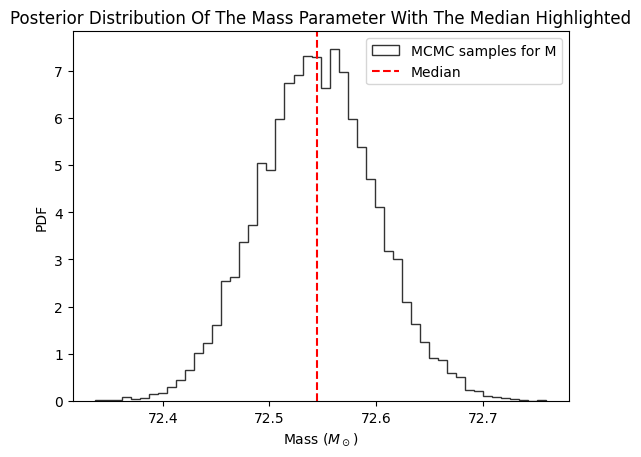

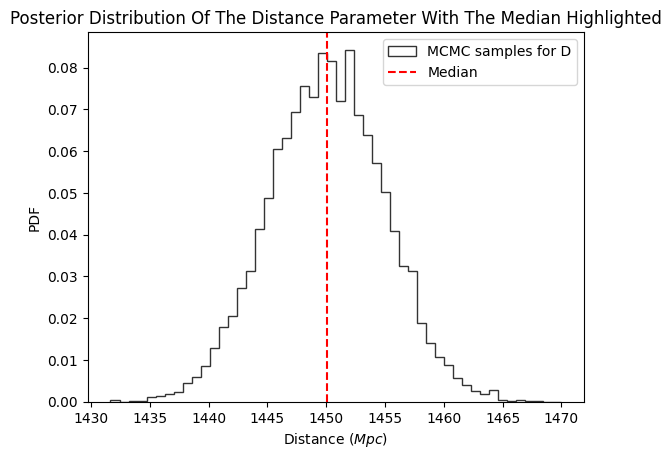

In [39]:
# Calculating the median
median_M = np.median(theta_samples[:, 0])
median_D = np.median(theta_samples[:, 1])
print(f"The median for M is {median_M:.2f} solar masses.")
print(f"The median for D is {median_D:.2f} Mpc.")

# Plotting the Mass distribution with the median
plt.hist(theta_samples[:, 0], bins=50,histtype='step',color='black', density=True, alpha=0.8, label='MCMC samples for M')
plt.axvline(median_M, color='r', linestyle='--', label='Median')
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('PDF')
plt.title('Posterior Distribution Of The Mass Parameter With The Median Highlighted')
plt.legend()
plt.show()

# Plotting the Distance distribution with the median
plt.hist(theta_samples[:, 1], bins=50,histtype='step',color='black', density=True, alpha=0.8, label='MCMC samples for D')
plt.axvline(median_D, color='r', linestyle='--', label='Median')
plt.xlabel('Distance ($Mpc$)')
plt.ylabel('PDF')
plt.title('Posterior Distribution Of The Distance Parameter With The Median Highlighted')
plt.legend()

The median values of the two parameters are $M=72.54 M\odot$ and $D=1450.24 Mpc$. As these values are consistent with our initial estimates, we can determine that we have successfully found well-constrained values for the mass and distance of the observed event.


**Credible Limits**

Credible limits are specific to Bayesian statistics. They represent the range of values that the parameters true value is expected to lie within, with a specific probability.
90% credible limits correspond to the range of values which 90% of the posteriors probability lies within. This is different to the frequentist confidence intervals, as Bayesian credible intervals directly quantify the probability that the true parameter lies within a given range.

These credible limits are commonly used to quantify the uncertainty in parameters (median values for example), especially in gravitational wave analysis. To find these credible limits, we can use `np.percentile`, to calculate the 90% credible limits. We can then use the 5th and 95th percentiles, which correspond to the lower and upper bounds of the 90% credible interval.


90.0% credible intervals for M: [72.45502995338417, 72.63565800607998]
90.0% credible intervals for D: [1441.950649392721, 1457.9164173307165]
8.1176380326026
7.848129905392852


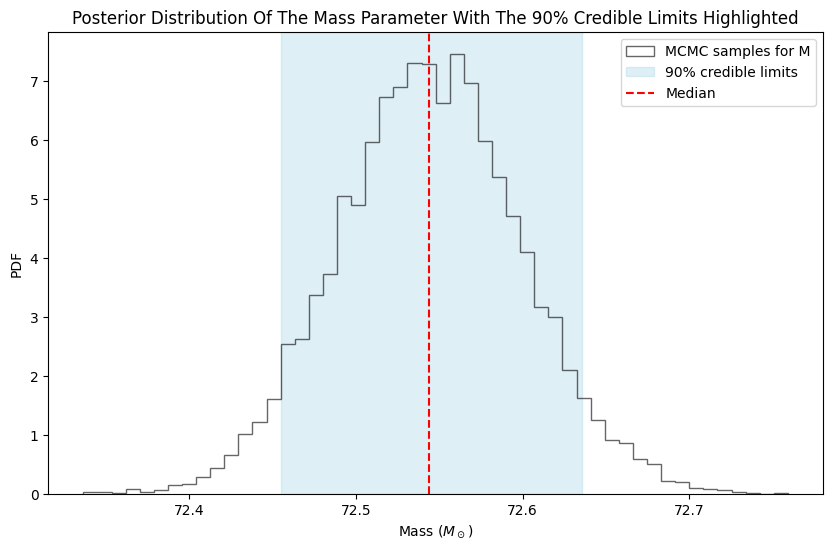

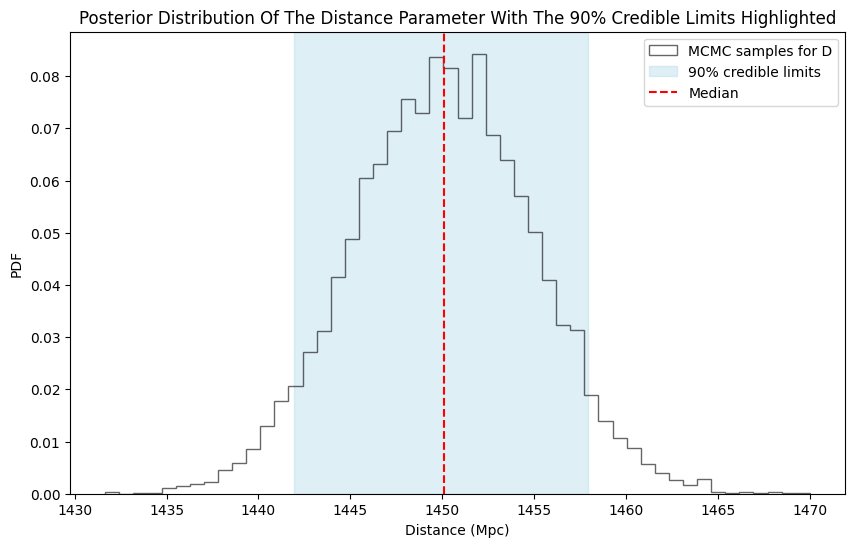

In [43]:
# Calculating the credible interval for M
credible_level = 0.9
lower_bound_M = np.percentile(theta_samples[:, 0], (1 - credible_level) / 2 * 100)
upper_bound_M = np.percentile(theta_samples[:, 0], (1 + credible_level) / 2 * 100)
print(f"{credible_level*100}% credible intervals for M: [{lower_bound_M}, {upper_bound_M}]")
plt.figure(figsize=(10, 6))
plt.hist(theta_samples[:, 0], bins=50,histtype='step',color='black', density=True, alpha=0.6, label='MCMC samples for M')
plt.axvspan(lower_bound_M, upper_bound_M, color = 'lightblue', label='90% credible limits',alpha = 0.4)
plt.axvline(median_M, color='r', linestyle='--', label='Median')
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('PDF')
plt.title('Posterior Distribution Of The Mass Parameter With The 90% Credible Limits Highlighted')
plt.legend()

# Calculating the credible interval for D
lower_bound_D = np.percentile(theta_samples[:, 1], (1 - credible_level) / 2 * 100)
upper_bound_D = np.percentile(theta_samples[:, 1], (1 + credible_level) / 2 * 100)
print(f"{credible_level*100}% credible intervals for D: [{lower_bound_D}, {upper_bound_D}]")
plt.figure(figsize=(10, 6))
plt.hist(theta_samples[:, 1], bins=50,histtype='step',color='black', density=True, alpha=0.6, label='MCMC samples for D')
plt.axvspan(lower_bound_D, upper_bound_D, color = 'lightblue', label='90% credible limits', alpha = 0.4)
plt.axvline(median_D, color='r', linestyle='--', label='Median')
plt.xlabel('Distance (Mpc)')
plt.ylabel('PDF')
plt.title('Posterior Distribution Of The Distance Parameter With The 90% Credible Limits Highlighted')
plt.legend()

print(f"{(median_D-lower_bound_D)}")
print(f"{(upper_bound_D-median_D)}")

The 90% credible limits for the mass and distance parameters are M=[72.45330714971757, 72.63745859263891]$M\odot$ and D=[1441.700688713655, 1458.4693734076263]$Mpc$, respectively.
By translating these ranges into uncertainties relative to the medians, we obtain the mass to be $72.54_{-9.0}^{+9.0} M\odot$ where the uncertainties are completely symmetric, and $1450.2_{-8.5}^{+8.2} Mpc$ for the distance, with slightly asymmetric uncertainties.

These values provide a clear quantification of the errors around the medians for both of the parameters. The mass posterior shows very tight constraints with a small symmetric uncertainty, whilst the distance parameter shows a slightly larger spread with asymmetric credible limits. This reflects the fact that the prior for the distance contains a wider range of values compared to the narrower prior for the mass.

**Comparison of MCMC Waveform and Observed Waveform**

Now that we have the best fit values and their corresponding uncertainties, we can compare the model generated waveform using these parameters, with our observed waveform in order to analyse how well they align.
A close agreement between the two waveforms would indicate that our parameter estimates are accurate and well-constrained.

So plotting both the waveforms:



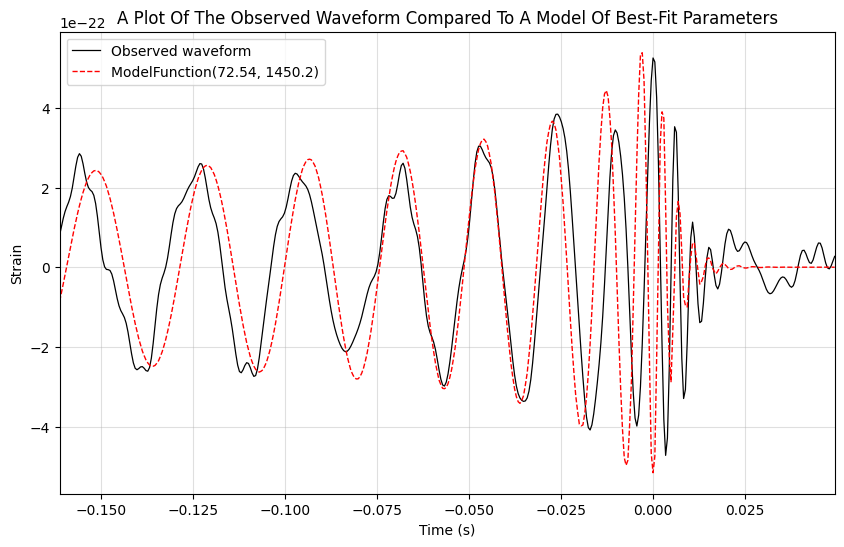

In [48]:
# Plotting the observed waveform and the model waveform
plt.figure(figsize=(10, 6))
plt.plot(ts_obs_time_two, obs_strain_two, color='black',linewidth=0.9, label='Observed waveform')
plt.plot(ts_obs_time_two, ModelFunction(median_M,median_D),'r--', linewidth=1, label = 'ModelFunction(72.54, 1450.2)')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.grid(alpha=0.4)
plt.title('A Plot Of The Observed Waveform Compared To A Model Of Best-Fit Parameters')
plt.legend()

Upon overlaying the two waveforms, we observe a strong visual match, particularly in the signal's amplitude and phase evolution. There is a slight misalignment in frequency at times less than -0.075s and greater than -0.025s, with the model waveform deviating from the observed one. However, within this time window, the two waveforms are aligned well. This misalignment in frequency suggests that there may be uncertainties or errors in the mass parameter, as it directly influences the frequency evolution of the waveform. Further improvement of the mass estimate through further parameter sampling or better prior constraints could help solve this problem.
This problem may be because the log-likelihood is less sensitive to changes in frequency compared to changes in amplitude. As a result, the fitting process would prioritise matching the amplitude of the waveform more accurately, while small variations in frequency have a reduced impact on the overall likelihood. This could explain why the amplitude aligns closely with the observed waveform, but not the frequency of it.

While minor discrepancies exist due to noise or modeling assumptions, the agreement is sufficient to confirm that the MCMC-derived parameters $M=72.5M_\odot$ and $D=1450Mpc$ are indeed a good fit to the observed data. This reinforces the effectiveness of our Bayesian approach and demonstrates the reliability of the posterior distributions we have obtained.

By reporting the median and credible limits, and comparing the generated waveform with the observed one, we ensure that our analysis is both statistically sound and visually validated, meeting the expectations of a robust parameter estimation process.

---

## **Part F - Putting it all together** - [36 marks]

#### Estimate the chirp mass for your system and the individual masses of your merging bodies, describing your reasoning. Comment on your individual masses.

If you are unable to get the MCMC in Part E working, please use your mass and distance estimate from the by-eye fit in part D3.

If your MCMC is working, please use your mass from the MCMC and by eye estimate of distance from Part D3 (option 1) or your mass and distance estimate from the MCMC (option 2).

**[5 marks]**

The chirp mass $\mathcal{M}$ is a fundamental parameter in gravitational wave analysis as it's the leading factor affecting the frequency evolution during the inspiral phase of a binary merger. Because of this, it is often a lot easier to measure than the individual masses or total mass of the system. The chirp mass is a combination of the component masses of the two objects in a binary system and is very important because it is one of the key parameters that is most accurately calculated in gravitational wave analysis.

The chirp mass $\mathcal{M}$ is defined in terms of the component masses $m_1$ and $m_2$ by the equation:

$$\mathcal{M}=\frac{(m_1m_2)^{\frac{3}{5}}}{(m_1+m_2)^{\frac{1}{5}}}$$

The mass ratio $q$, is defined as the ratio of the two component masses,  $q=\frac{m_2}{m_1}$. If we assume that the two bodes are of equal mass, such that $m_1=m_2$, the mass ratio is equal to one ($q=1$). The total mass is the sum of both the component masses, which in the case of equal masses, is just double. We have already obtained a value for the total mass, $m_{tot} = 72.54\pm0.9 M\odot$ and so we can determine the component masses as below:

$$m_1=m_2 = \frac{m_{tot}}{2} = \frac{72.54\pm0.9 M\odot}{2} = 36.27\pm0.45 M\odot$$

We obtain avalue of $36.27\pm0.45 M\odot$ for the component masses of the objects, which suggests that these objects are likely stellar mass black holes as they typically range from a few to several tens of solar masses.

However, focusing on the chirp mass, in the case where $(m_1=m_2)$, the equation for the chirp mass simplifies to:

$$\mathcal{M}=\frac{(m)^{\frac{6}{5}}}{(2m)^{\frac{1}{5}}}$$

where $m$ is the component mass.

Finally we can substitute $m=\frac{M_{tot}}{2}$ to get the chirp mass in terms of the total mass of a system with a mass ratio of $q=1$:

$$\mathcal{M}=\frac{m_{tot}}{2^{\frac{6}{5}}}$$

To estimate the chirp mass from our results, we use the total mass samples calculated earlier from the MCMC. We can then substitute these values into the equation above, which gives us the distribution of the chirp mass. From this, we can determine the median chirp mass as well as the 90% credible limits by using the `np.percentile` function, giving us an estimate of $\mathcal{M}$ with its corresponding errors. This is something we wouldn't have been able to do had we only  substituted the median, $m_{tot}$, into the equation.


The calculated chirp mass is: 31.58/+-0.04/--0.04 solar masses


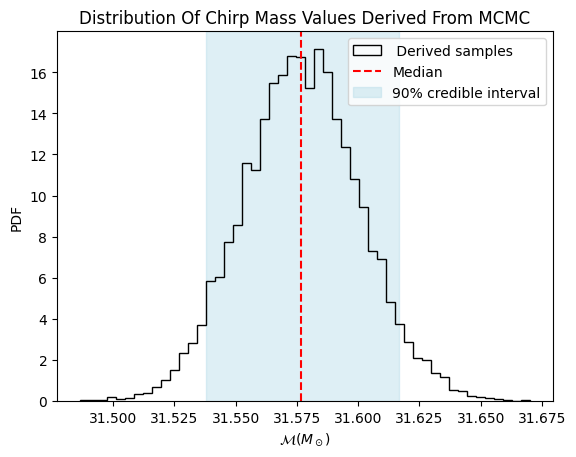

In [50]:
# Defining an array of the individual masses from the total mass samples
m_tot = theta_samples[:,0]
individual_m = m_tot/2

# Calculating the chirp mass and median
chirp_mass = (m_tot) / (2)**(6/5)
median_cm = np.median(chirp_mass)

# Calculating the credible intervals to use as uncertanties
credible_level = 0.9
upper_bound_cm = np.percentile(chirp_mass, (1 - credible_level) / 2 * 100)
lower_bound_cm = np.percentile(chirp_mass, (1 + credible_level) / 2 * 100)
print(f"The calculated chirp mass is: {median_cm:.2f}/+{upper_bound_cm-median_cm:.2f}/-{median_cm-lower_bound_cm:.2f} solar masses")

# Plotting the distribution
plt.hist(chirp_mass, bins=50,histtype='step', density=True,color='black', label=' Derived samples')
plt.axvline(median_cm, color='r', linestyle='--', label='Median')
plt.axvspan(lower_bound_cm, upper_bound_cm, color='lightblue', alpha=0.4, label='90% credible interval')
plt.xlabel('$\mathcal{M}  (M_\odot)$')
plt.ylabel('PDF')
plt.title('Distribution Of Chirp Mass Values Derived From MCMC')
plt.legend()

From this, we determine the median chirp mass to be $31.58\pm0.04 M\odot$ with the uncertainties derived from the 90% credible limits on the distribution.
This value is consistent with a system of equal component masses with total mass $m_{tot}=72.54\pm0.9 M\odot$.

To further verify our result we can use the data given to us in part a to plot the chirp mass and total mass of multiple systems and derive a relationship between the two. This comparison will help us to evaluate the validity of our result and ensure that it is consistent with other gravitational wave observations.

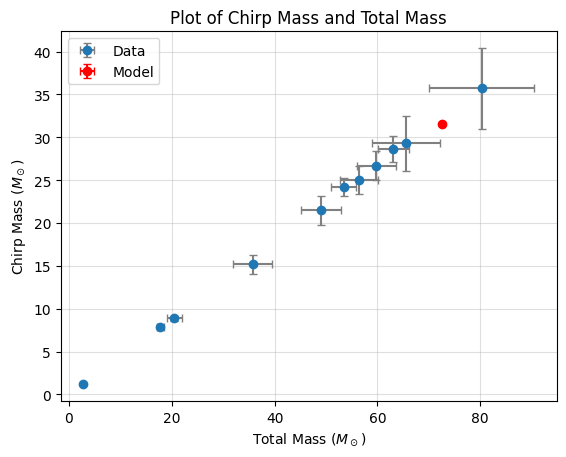

In [53]:
# Defining the chirp mass and total mass values and errors
chirp_mass1 = posteriors['Mchirp']
chirp_mass_error1 = posteriors['Mchirp_err']
total_mass = posteriors['Mtot']
mass_error = posteriors['Mtot_err']

# Plotting the data with the additional point for this analysis
plt.errorbar(total_mass, chirp_mass1, xerr=np.abs(mass_error), yerr=np.abs(chirp_mass_error1), fmt='o',ecolor='gray', label='Data', capsize=3)
plt.errorbar(median_M, median_cm, xerr=[[np.abs(upper_bound_M-median_M)], [np.abs(median_M-lower_bound_M)]], yerr=[[np.abs(upper_bound_cm-median_cm)], [np.abs(median_cm-lower_bound_cm)]], fmt='ro', label='Model', capsize=3)
plt.xlabel("Total Mass ($M_\odot$)")
plt.ylabel("Chirp Mass ($M_\odot$)")
plt.title("Plot of Chirp Mass and Total Mass")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

As you can see from the plot above, our values of the total and chirp mass appear to align with the previous observations. However to verify this further we can determine a relationship between the total mass and chirp mass values, we can use the weighted chi-squared test, $\chi^2$, to fit a linear relationship of the form

$$y=A+Bx$$

where, in this case:
- $y$ is the chirp mass $\mathcal{M}$,
- $x$ is the total mass $M$,
- $A$ is the intercept, and
- $B$ is the gradient.

We can fit a linear model to the data, as it consists of an independent variable $M_{tot}$ and a dependent variable $\mathcal{M}$. To find the best fit values of $A$ and $B$, we can use `opt.minimize` to find the values at which $\chi^2$ is at a minimum.

The chi-squared test measures the deviation between the observed data points and the predicted values generated from the linear model above, weighted by the errors in $x$ and $y$. The total error in $y$, $\sigma_y^{{total}}$, incorporates errors in $y$ and $x$, which is scaled by the gradient $B$. The total error in $y$ then is given by the equation:

$$\sigma_y^{\text{total}} = \sqrt{\sigma_y^2 + (B \cdot \sigma_x)^2}$$

Which gives the weighted chi-squared as:

$$\chi^2 = \sum \left( \frac{y_i - (A + Bx_i)}{\sigma_{y, i}^{\text{total}}} \right)^2$$

By minimizing $\chi^2$, we can find the best fit values of $A$ and $B$, to determine how the chirp mass scales with the total mass, from which we can compare our value to.

Fitting a straight line:


Fitted parameters: A = -0.17, B = 0.45


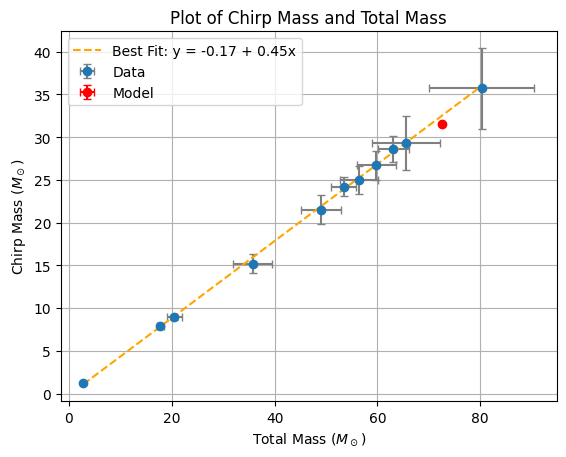

In [57]:
# Defining a function that does a chi_squared test
def chi_squared(params, x, y, sigma_x, sigma_y):
    A, B = params
    sigma_y_total = np.sqrt(sigma_y**2 + (B * sigma_x)**2)
    chi2 = np.sum(((y - (A + B * x)) / sigma_y_total)**2)
    return chi2

# Minimizing chi squared
initial_guess = [1, 1]
result = opt.minimize(chi_squared, initial_guess, args=(total_mass, chirp_mass1, mass_error, chirp_mass_error1))
A_fit, B_fit = result.x
print(f"Fitted parameters: A = {A_fit:.2f}, B = {B_fit:.2f}")

# Plotting the data and the fit
x_fit = np.linspace(min(total_mass), max(total_mass), 100)
y_fit = A_fit + B_fit * x_fit

# Defining a function that does a chi_squared test
def chi_squared(params, x, y, sigma_x, sigma_y):
    A, B = params
    sigma_y_total = np.sqrt(sigma_y**2 + (B * sigma_x)**2)
    chi2 = np.sum(((y - (A + B * x)) / sigma_y_total)**2)
    return chi2

# Minimizing chi squared
initial_guess = [1, 1]
result = opt.minimize(chi_squared, initial_guess, args=(total_mass, chirp_mass1, mass_error, chirp_mass_error1))
A_fit, B_fit = result.x

# Plotting the data and the fit
x_fit = np.linspace(min(total_mass), max(total_mass), 100)
y_fit = A_fit + B_fit * x_fit
plt.errorbar(total_mass, chirp_mass1, xerr=np.abs(mass_error), yerr=np.abs(chirp_mass_error1), fmt='o',ecolor='gray', label='Data', capsize=3)
plt.errorbar(median_M, median_cm, xerr=[[np.abs(upper_bound_M-median_M)], [np.abs(median_M-lower_bound_M)]], yerr=[[np.abs(upper_bound_cm-median_cm)], [np.abs(median_cm-lower_bound_cm)]], fmt='ro', label='Model', capsize=3)
plt.plot(x_fit, y_fit, label=f"Best Fit: y = {A_fit:.2f} + {B_fit:.2f}x", linestyle='--', color='orange')
plt.xlabel("Total Mass ($M_\odot$)")
plt.ylabel("Chirp Mass ($M_\odot$)")
plt.title("Plot of Chirp Mass and Total Mass")
plt.legend()
plt.grid(True)
plt.show()

Upon doing the $\chi^2$ analsyis, we found the relationship between the total mass and the chirp mass of a system to be:

$$\mathcal{M} = 0.45M_{tot} - 0.17$$

This equation indicates that as the total mass of the system increases, the chirp mass increases linearly. The coefficient of 0.45 aligns with our initial expectations, as the chirp mass is typically around half of the total mass for systems with a mass ratio close to 1 so a good approximation could be $\mathcal{M} = \frac{M_{tot}}{2}$. We can substituting our value fot the total massof the system $M = 72.54M_\odot$ into the equation to get:

$$\mathcal{M} = 0.45(72.54) - 0.17 = 32.47 \, M_\odot$$

This result determined from the linear relationship is relatively close to our calculated value of $\mathcal{M} = 31.58 \pm 0.04 \, M_\odot$ with a **maximum** difference of $0.93M_\odot$. The consistency of these two values helps to validate the accuracy of our calculations.

---

#### Estimate the period from your observed waveform around the peak amplitude of the wave.

**[14 marks]**

The period of a waveform can be defined as the time it takes for one complete oscillation of the wave to occur, or the distance between two successive points that are in phase. Furthermore, the period, $P$, is related to the frequency, $f$, by the equation $P = \frac{1}{f}$, where the frequency is how often the cycle repeats per second.  

In the context of gravitational waves, the direct relationship between the period and frequency of the resultant waveform is crucial. Once the period evolution of the waveform has been calculated, this can be translated into a frequency evolution, from which we can learn more about the nature of the initial binary system. As the two objects inspiral towards each other and eventually merge, their frequency increases (hence the period decreases) due to the decay of their orbits. This decay results in a decrease in orbital separation and an increase in the objects velocities.

To summarise, the period of a gravitational waveform is an important gateway to understand more about the origins of the binary system. So how do we find the period of a gravitational waveform?

Unfortunately there is no easy way to do this, given that signals are not only constantly change in frequency and amplitude over time, but are also crowded with noise. Consequently, the period is a difficult value to calculate.

Before attempting to find it analytically, we can make a by-eye estimate by plotting vertical lines at the peak amplitude which occurs at the merger, and the peak of the previous oscillation. This helps to make sure that our final value is approximately correct.

The initial estimated period around the peak amplitude is 0.0103s


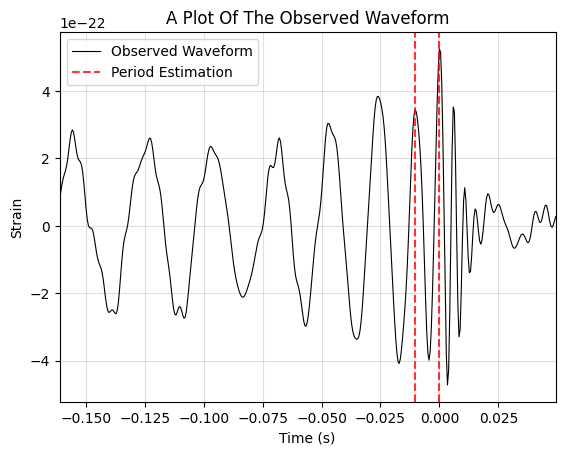

In [63]:
plt.plot(ts_obs_time_two, obs_strain_two, lw = 0.8, color='black', label='Observed Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.grid(alpha=0.4)
plt.title('A Plot Of The Observed Waveform')
plt.axvline(x=0, color='r', linestyle='--', label='Period Estimation',alpha=0.8)
plt.axvline(x=ts_obs_time_two[np.argsort(obs_strain_two)[418]], color='r', linestyle='--', alpha=0.8)
plt.legend()

period_at_peak = 0 - ts_obs_time_two[np.argsort(obs_strain_two)[418]]
print(f"The initial estimated period around the peak amplitude is {period_at_peak:.4f}s")

Finding the difference between the peak amplitudes (the red dashed lines), we can get a first estimate for the period of the wavform, $P = 0.0103s$.

Now we have a rough initial estimate on the period of the observed gravitational waveform around the peak amplitude, we can start to take a more detailed approach. While there are many complex and computationally expensive methods of doing this, we will attempt a simpler approach in which we track where the waveform crosses the x-axis (a zero-crossing) as it is easier to determine than the peak value. We can then calculate how the period of the wave varies with respect to time. We can fit a model to this data and extrapolate to determine the period at $t=0s$, which corresponds to when the merger occurs and hence the peak amplitude.
This method allows us to analytically track the evolution of the period of the waveform, whilst also being much less computationally expensive than other approaches.

The first step is to identify the points where the waveform crosses the $x=0$ axis. This can be done by using the `np.sign()` function, which determines the sign of each point in an array of data. We then use `np.diff()` to locate the points where the sign changes, indicating a crossing of the x-axis. Finally, we use `np.where()` to identify the indices where these sign changes occur, giving us the zero crossings of the waveform.

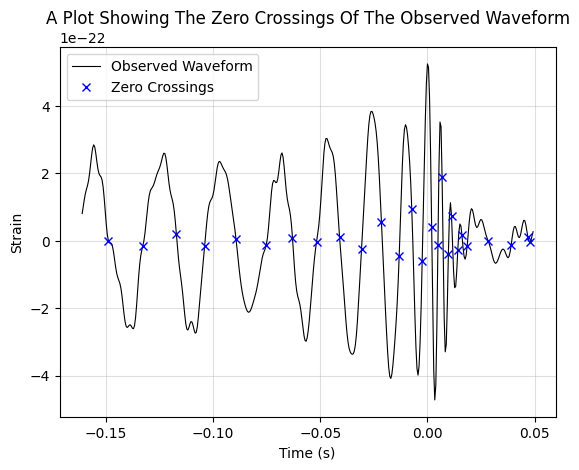

In [68]:
# Finding the zero crossing indices and corresponding times and strains
zero_crossings = np.where(np.diff(np.sign(obs_strain_two)))[0]
zero_crossing_times = ts_obs_time_two[zero_crossings]
zero_crossing_strain = obs_strain_two[zero_crossings]

# PLotting the waveform with its calculated zero crossings
plt.plot(ts_obs_time_two, obs_strain_two,lw=0.8, color='black', label='Observed Waveform')
plt.plot(zero_crossing_times, zero_crossing_strain, 'bx',markersize=6, label='Zero Crossings')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.title('A Plot Showing The Zero Crossings Of The Observed Waveform')
plt.legend()
plt.grid(alpha=0.4)

Looking at the graph above, it's clear we have a problem. Most of the points identified as zero crossings are, in fact, quite far from the x-axis. The reason for this is because the observed strain and observed time arrays only contain 432 data points, which although this number of points may seem relatively large, it is insufficient around $t=0s$, where the waveform changes drastically. Consequently, the points do not accurately represent the waveform during these times.

In order to try to resolve this, we can use interpolatation, similar to the approach we took in part c. First we create an interpolation object:

`interp_object = interp1d(ts_obs_time_two, obs_strain_two, bounds_error = False')`

which interpolates the observed waveform data. We then create a new time array

`interp_time_zc = np.linspace(ts_obs_time_two.min(), ts_obs_time_two.max(), 10000)`

that consists of 10,000 points between the minimum and maximum values of the original time array. This higher resolution grid will allow for a more detailed interpolation of the data and hence the zero crossing positions will be more accurate. We then caluculate the strain along the new time points using the interpolation object:

`interp_strain_zc  = interp_object(ts_interp)`



In summary, we take the observed time and strain data, create an interpolation object, from which we form a time array with a higher resolution and interpolate the observed strain over this new time array. This results in a more accurate representation of the zero crossings as seen in the code below.

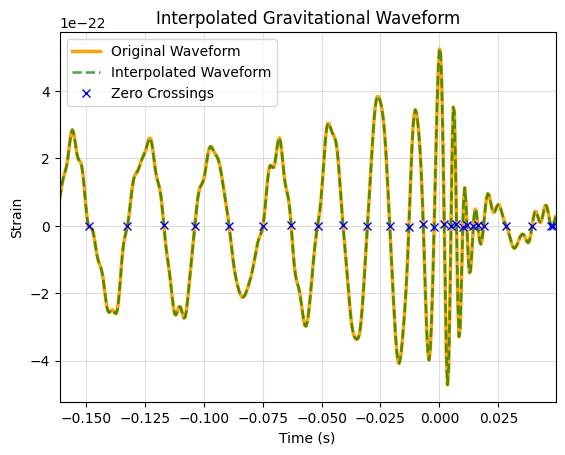

In [83]:
# Performing the interpolation
interp_object = interp1d(ts_obs_time_two, obs_strain_two,bounds_error=False)
interp_time_zc = np.linspace(ts_obs_time_two.min(), ts_obs_time_two.max(), 10000)
interp_strain_zc = interp_object(interp_time_zc)

# Finding the zero crossings in the interpolated waveform
zero_crossings = np.where(np.diff(np.sign(interp_strain_zc)))[0]
zero_crossing_times = interp_time_zc[zero_crossings]
zero_crossing_strain = interp_strain_zc[zero_crossings]

# Plotting the observed and interpolated waveforms as well as their zero crossings
plt.plot(ts_obs_time_two, obs_strain_two, label='Original Waveform', color='orange', linewidth=2.5)
plt.plot(interp_time_zc, interp_strain_zc, label='Interpolated Waveform', linestyle='--', color='g', linewidth=1.8, alpha = 0.7) #Corrected this line
plt.plot(zero_crossing_times, zero_crossing_strain, 'bx',markersize=6, label='Zero Crossings')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(min(ts_obs_time_two),max(ts_obs_time_two))
plt.title('Interpolated Gravitational Waveform')
plt.grid(alpha=0.4)
plt.legend()

As we can see in the plot above, the interpolated waveform matches the observed waveform perfectly (as expected). Furthermore, the zero crossings are now almost exactly on the x = 0 axis, allowing for a more accurate analysis of the period.

Now that we have identified the positions of the zero crossings, we can determine how the period changes over time. First, we calculate the time difference between each pair of consecutive zero-crossings. Then, since a full wave oscillation includes two zero crossings, multiplying this time difference by 2 gives us a value for the period. We can then plot these period values against the midpoints of each pair of zero crossings to get a better visualisation on how the period evolves over time.

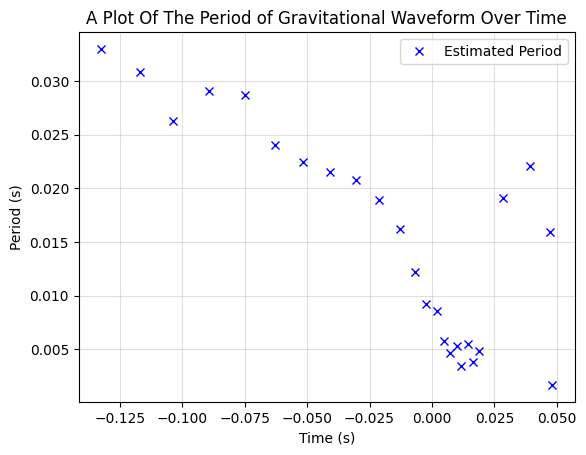

In [84]:
# Calculating the periods (time intervals between consecutive zero-crossings)
periods = np.diff(zero_crossing_times) * 2

# Calculate the midpoints of each zero crossing
midpoints = zero_crossing_times[:-1] + (periods / 2)

# Plotting the period over time
plt.plot(midpoints, periods, 'bx', label = 'Estimated Period')
plt.xlabel('Time (s)')
plt.ylabel('Period (s)')
plt.title('A Plot Of The Period of Gravitational Waveform Over Time')
plt.grid(alpha=0.4)
plt.legend()

From the plot, we can see that the period decreases exponentially until $t=0s$ as the objects accelerate towards each other causing their orbits to shrink until they merge. After this point, the period fluctuates significantly, which can be attributed to the pure noise present during this time.

To determine the period at  $t=0s$, we can fit a model of the form:

$${Ax^2 + Bx + C}$$

to the data up to the time of the merger (since we are not interested in the ringdown period after the merger). A quadratic model was chosen because the data appears to a follow a negative curve that would be best modelled by one. We can then use `scipy.optimize.curve_fit` to find the best-fit parameters A, B, and C. Once we have found these parameters, we can substitute $t = 0s into the model to get an analytical value for the period around the peak amplitude.

Optimal A: -1.05
Optimal B: -0.29
Optimal C: 0.01
The period of the waveform around the peak amplitude using the derived relationship is 0.0112


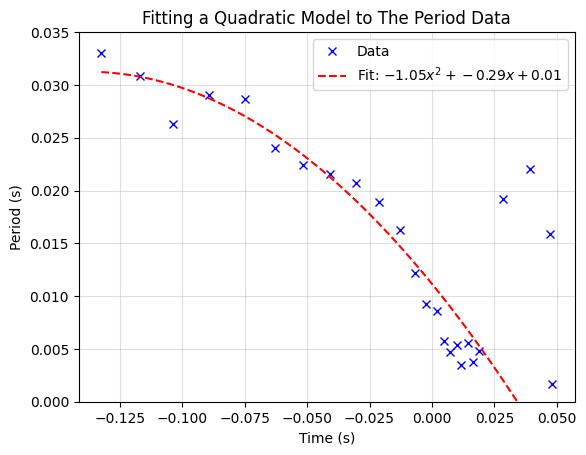

In [86]:
# Defining the quadratic model
def quadratic_model(x, A, B, C):
    return A*x**2 + B*x + C

# Performing the curve fit using only the data we are interested in (excluding the last 12 points after the merger)
params, covariance = curve_fit(quadratic_model, midpoints[:-12], periods[:-12])

# Getting the optimal values for A, B and C
A, B, C = params

# Generating data for plotting the fitted curve
x_fit = np.linspace(midpoints.min(), midpoints.max(), 100)
y_fit = quadratic_model(x_fit, A, B, C)

# Plotting the data and the fitted curve
plt.plot(midpoints, periods, 'bx', label='Data')
plt.plot(x_fit, y_fit, 'r--', label=f'Fit: ${A:.2f}x^2 + {B:.2f}x + {C:.2f}$')
plt.xlabel('Time (s)')
plt.ylabel('Period (s)')
plt.title('Fitting a Quadratic Model to The Period Data')
plt.grid(alpha=0.4)
plt.ylim(0, 0.035)
plt.legend()

# Printing the optimal values for the paramaters
print(f"Optimal A: {A:.2f}")
print(f"Optimal B: {B:.2f}")
print(f"Optimal C: {C:.2f}")

# Printing the period of the waveform around the peak amplitude
print(f"The period of the waveform around the peak amplitude using the derived relationship is {quadratic_model(0, A, B, C):.4f}")

After curvefitting, we find that the period of the gravitational waveform follows the relationship:

$$P = -1.05t^2 -0.29t + 0.01$$

This shows the expected decrease in period as the waveform progresses up to the merger, due to the inspiraling bodies. Substituting a value of $t=0s$ into our model above gives us a value for the period, $P=0.0112s$, which is extremely close to our initial 'by-eye' estimate of $P=0.0103s$.

---

#### Assuming that the objects are not spinning, and that their orbits are Keplerian and essentially circular, use your period to estimate the orbital separation in km of the two bodies around peak amplitude. Think carefully about how the orbital period is related to the period of your gravitational wave.

**[12 marks]**

The radial seperation $R$ of two bodies refers to the distance between the centres of the two objects. During the inspiral phase, the two orbits decay gradually, causing their radial seperation to decrease as they lose energy. We  expect it to reach a minimum when the objects merge together as the bodies get extremely close to each other. An important thing to note is that we don't expect $R=0km$ when the two objects merge. This is due to the fact that we need general relativity in order to accurately model the velocities these objects are travelling at, however we are using Newtonian physics Furthermore, in some cases the centres of the objects  never reach the same location in space because, just before the merger occurs, the radial separation, $R$, between the two objects is reduced to a distance comparable to their Schwarzschild radii (for black holes) or physical radii (for neutron stars).

To estimate the orbital separation $R$ of the two bodies around the peak amplitude of the gravitational wave, we can use the following equation:

$$R = \left( \frac{G(M_1 + M_2)}{\omega^2} \right)^{1/3}$$

Where:  
- $R$ is the orbital separation of the objects.  
- $G$ is the gravitational constant ($6.67430 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2}$).  
- $M_1$ and $M_2$ are the individual masses of the objects.  
- $\omega$ is the angular frequency, which is related to the orbital period $P_{orb}$ by $\omega = \frac{2\pi}{P_{orb}}$.  

We also make the following assumptions:  

1. The orbital period $P_\text{orb}$ is twice the gravitational wave period due to the fact that after half a revolution, the two objects have simply swapped their positions. The second half of the orbit repeats the same motion pattern as the first half, and the gravitational wave signal is therefore repeated accordingly. Hence one orbital period corresponds to two periods in the gravitational waveform.  

2. The objects are not spinning and are in circular Keplerian orbits until they merge.

3. The total mass of the system, $M_{tot} = M_1 + M_2 = 72.54 \, M_\odot$, where $1 M_\odot = 1.989 \times 10^{30} \, \text{kg}$.

To obtain an initial estimate of the orbital separation at the peak amplitude, we can use the period $P_{GW}$ of the waveform around the peak amplitude. By substituting this value into the equation above, we can directly calculate the orbital separation around the peak amplitude. The steps are shown below:

$$P_\text{orb} = 2 P_\text{GW} = 2 \times 0.0112= 0.0224 \, \text{s}.$$

Therefore:
$$R = \left(\frac{6.67430 \times 10^{-11}\times (72.54\times1.989 \times 10^{30})}{(\frac{2\pi}{0.0224})^2} \right)^{1/3}=496.5km$$

Consequently, we calculate the radial seperation around the peak amplitude to be $R=494.5km$. This distance corresponds to the separation between the centers of the objects as they begin to merge.

To determine how the radial separation changes over time for the system, we can first define a function that calculates the radial separation of the objects given the period of the gravitational waveform $P_{GW}$. Next, we substitute the values for the period of the gravitational wave over time from the previous question into this function to obtain a plot of the radial separation over time. Then by fitting a quadratic model to the data (since we expect the data to be the same shape as the previous question) we can find the relationship for how the radial separation changes with respect to time. We will substitute $t=0s$ into the model to determine an analytical value for $R$ around the peak amplitude. First we start by defining the function.

In [91]:
# Defining the function that calculates R given P_GW
def orbital_separation(P_GW):
  G = 6.67430e-11
  M = 72.54 * 1.989e30
  P_orb = 2 * P_GW
  omega = 2 * np.pi / P_orb
  R = ((G*M)/(omega**2))**(1/3)
  return R/1000
# Verifying it works
print(f"The orbital seperation around the peak amplitude is {orbital_separation(0.0112):.2f}km")

The orbital seperation around the peak amplitude is 496.50km


Now that we have created the function and verified it works correctly by repeating the previous calculation and obtaining the same answer, we can substitute our values for the period of the waveform from the previous question into the function. Following from this, we will be able to plot how the radial separation changes over time.

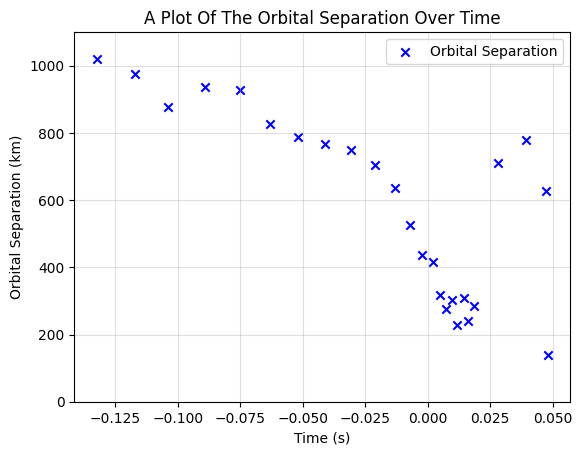

In [94]:
# Passing the values of the period of the waveform through the function
orbital_separations = orbital_separation(periods)

# Plotting the orbital separation over time
plt.scatter(midpoints, orbital_separations,marker='x', label="Orbital Separation", color="blue")
plt.title("A Plot Of The Orbital Separation Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Orbital Separation (km)")
plt.ylim(0,1100)
plt.grid(alpha = 0.4)
plt.legend()

As can be seen in the plot above, the data expectedly follows the same pattern as in the previous question with the orbital separation decreasing along a curve as the objects inspiral closer together until they merge. Consequently, we can fit a quadratic function to this data using curvefit, as done previously, to establish a relationship between the period and the radial separation.

Optimal A: -30588.00
Optimal B: -7655.44
Optimal C: 497.01
The orbital separation of the objects around the peak amplitude using the derived relationship is 497.01km


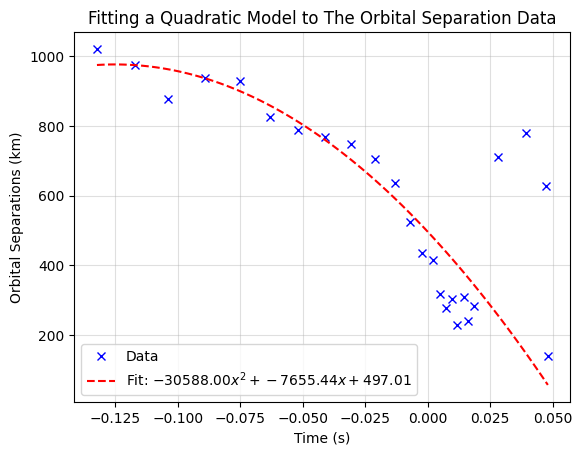

In [97]:
# Performing the curve fit using only the data we are interested in (excluding the last 12 points after the merger)
params, covariance = curve_fit(quadratic_model, midpoints[:-12], orbital_separations[:-12])

# Getting the optimal values for A, B and C
A, B, C = params

# Generating data for plotting the fitted curve
x_fit = np.linspace(midpoints.min(), midpoints.max(), 100)
y_fit = quadratic_model(x_fit, A, B, C)

# Plotting the data and the fitted curve
plt.plot(midpoints, orbital_separations, 'bx', label='Data')
plt.plot(x_fit, y_fit, 'r--', label=f'Fit: ${A:.2f}x^2 + {B:.2f}x + {C:.2f}$')
plt.xlabel('Time (s)')
plt.ylabel('Orbital Separations (km)')
plt.title('Fitting a Quadratic Model to The Orbital Separation Data')
plt.grid(alpha=0.4)
plt.legend()

# Printing the optimal values for the paramaters
print(f"Optimal A: {A:.2f}")
print(f"Optimal B: {B:.2f}")
print(f"Optimal C: {C:.2f}")

# Printing the orbital seperation around the peak amplitude
print(f"The orbital separation of the objects around the peak amplitude using the derived relationship is {quadratic_model(0, A, B, C):.2f}km")

After fitting the quadratic function to the data, we find the relationship to be:

$$R = -30588t^2-7655.44t+497.01$$

Hence when $t=0s$, we get a value of $R = 497.01km$, which is in close agreement with the previously calculated value of $496.5km$.

An orbital period of $P_{orb}=0.0224s$ at a radial distance of $R=496.01km$ suggests the objects were moving incredibly fast at the time of the merger, at an estimated velocity $v = \frac{\pi\times496.01\times10^3m}{0.0224s} = 6.96\times10^7\,ms^{-1}$ or $0.23c$ where $c=3\times10^8$, the speed of light.

---

#### Comment on what your analysis suggests are the best astrophysical candidates for the merging objects?

**[5 marks]**

Upon the completion of our analysis of the observed gravitational waveform, we have derived the following key parameters that describe the binary system:

*   Distance from the Earth:
  * $D = 1450.20_{-8.5}^{+8.2}\,Mpc$.
*   Total mass of the system:
  * $m_{tot}=72.54\pm0.9 M\odot$
  * with component masses $m_1=m_2 = 36.23\pm0.45 M\odot$.
*   Chirp mass:
  * $\mathcal{M}=31.58\pm0.04M\odot$.
*   Orbital period:
  * $P_{orb}=0.0224s$ (at the time of the merger).
*   Orbital seperation:
  * $R=497.01\,km$ (at the time of the merger).

These values offer valuable insights into the binary system and can help us in identifying the best astrophysical candidates for the merging objects.

**Distance**

While at first it might not seem it, there is a lot we can learn from our value for the distance of the system, $D = 1450.20_{-8.5}^{+8.2}\,Mpc$.

As mentioned previously, the further away an event is, the stronger it needs to be in order for it to be detectable over the noise. Therefore, objects that produce weaker gravitational waves such as neutron stars will have to be a lot closer in order for us to be able to detect them compared to objects like high-mass black holes. As it turns out the distance a binary neutron star system needs to be at in order for it to be detectable is actually comparable small.

????


As we can see in the figure above, using the values from the current observing run O4 for the most sensitive detectors (LIGO), the maximum distance at which a binary neutron star merger can be detected is $160-190\,Mpc$. This range of values is significantly less than our value of $D = 1450.2_{-8.5}^{+8.2}\,Mpc$, therefore assuming our value of $D$ is correct, it's simply not possible for our observed waveform to originate from a binary neutron star merger, as it would be too far away to be detectable.

**Mass**

Arguably the most telling value for finding the astrophysical origins of the event is its mass. If we put aside the total mass and focus on the component masses, assuming for a mass ratio of 1, is $m = 36.23\pm0.45\,M\odot$. This value is typical of a stellar-mass black hole, as their masses typically range from a few solar masses to several tens of solar masses. However, the maximum mass possible for a neutron star is estimated to be in the range $1.44M_\odot$ to $3M_\odot$, which is significantly lower than our $m$ value. Hence one again, we can conclude that the objects are not neutron stars and most likely stellar-mass black holes.

This is supported further by our value for the chirp mass, $\mathcal{M}=31.58\pm0.04M\odot$, as the chirp mass generally reflects the masses of the individual objects.

**Mass range of neutron stars:** *Lattimer, James M., and Maddappa Prakash. "The physics of neutron stars." Science 304, no. 5670 (2004): 536-542.*


**The Merger**

Whilst maybe not so conclusive, the period and radial seperation of the objects at the time of the merger might help provide some supporting evidence in our conclusion for the best astrophysical candidates for the objects.

Assuming the objects merged at exactly $t=0s$, we know this occurred at a radial separation of $R=497.01km$. Since the radial seperation corresponds to to the distance between the objects centers, if we assume the merger happened as soon as the two objects came into contact and that they have equal masses, we can approximate their radius by dividing the orbital separation by 2.

$$Radius\approx\frac{497.01km}{2}=248.51km$$

This estimated value for the radii of the objects is far too big to be a neutron star, as they typically have radii of approximately $10 km$. It is however typical of a stellar-mass black radius which can have radii anywhere from $15km$ to $300km$..

It's important to note that the results discussed in this section require further investigation to confirm their validity. Such extreme events require complex models that take into account the effects of general relativity which have not been considered here. Therefore these values may not be as accurate as they seem, but they are useful for getting a general idea.

**Conclusion**

In conclusion, our analysis suggests that the most likely astrophysical candidates for the merging objects are stellar-mass black holes. This conclusion was reached through the use of a Markov Chain Monte Carlo to estimate the distance $D$ and total mass $m_{tot}$ of the binary system from an observed gravitational waveform. The obtained values align closely with those from previous observations of gravitational waveforms produced by binary black hole mergers.

To further validate this conclusion, additional parameters such as the effective spin, $\chi_{eff}$, of the binary system could be determined to provide deeper insights in the origins of the gravitational wave. Furthermore, the analysis could be rerun using more advanced techniques, such as numerical relativity, which would most likely describe the system better and obtain more accurate values for parameters.

---